In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
sns.set()

In [3]:
path = 'Data'

In [4]:
# Data Importing
train = pd.read_csv(f'{path}/train.csv', index_col='Id')
test = pd.read_csv(f'{path}/test.csv', index_col='Id')

In [5]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


<b>Looks like we have 79 features to choose from.</b>

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

# 1. Data Cleaning

<b>Let's check for missing values.</b>

In [7]:
missing_columns = train.columns[train.isnull().any()]

<b>Let's take a look at each of these columns to decide how to handle the missing data. I want to check the relative percentage of each missing column.</b>

In [8]:
missing_pct = (train[missing_columns].isnull().sum() / len(train)) * 100
missing_pct


LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

<b>Looks like Alley, MasVnrType, FireplaceQu, PooQC, Fence, and MiscFeature have a very large number of missing values, so I will drop these as features completely.</b>

In [9]:
train = train.drop(columns=['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500


<b>Let's seperate out numerical columns with missing values and categorical, so that we can decide how to handle the rest of the missing data.</b>

In [10]:
missing_columns = train.columns[train.isnull().any()]
missing_columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [11]:
numerical_missing = train[missing_columns].select_dtypes(include=np.number)
categorical_missing = train[missing_columns].select_dtypes(exclude=np.number)

In [12]:
numerical_missing.describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


<b>Looks like we have 3 numerical features which have missing values. Let's check distribution plots to decide how to handle them.</b>

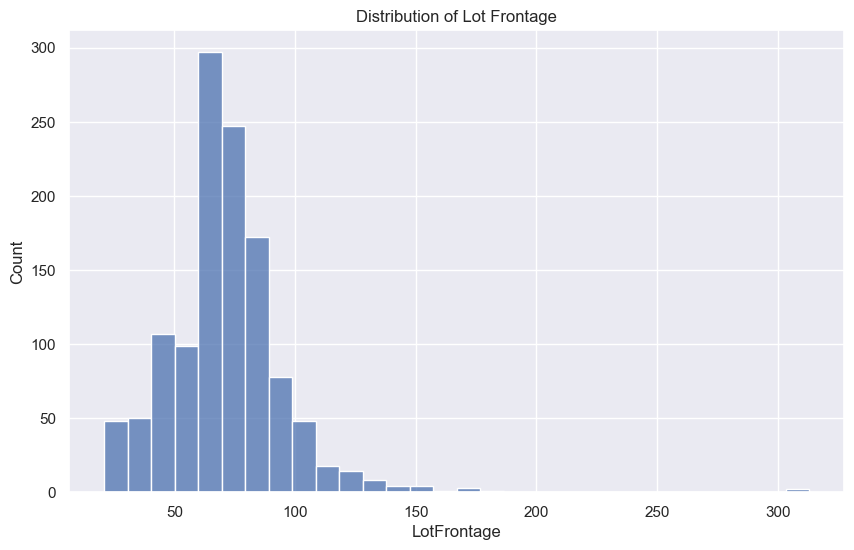

In [13]:
plt.figure(figsize=(10,6), dpi=100)
plt.title('Distribution of Lot Frontage')
sns.histplot(train['LotFrontage'], kde=False, bins=30);

<b>Looks like Lot Frontage is pretty well centered about the mean. I will use the mean to fill missing values.</b>

In [14]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())

<b>Let's check to see if the distribution has changed.</b>

In [15]:
train['LotFrontage'].describe()

count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

<b>The standard deviation changed from 24.28 to 22.02, and the median changed from 69 to 70. Overall however I would say this is a decent method of imputation for this feature.</b>

<b>Now let's check a distribution plot of MasVnrArea</b>

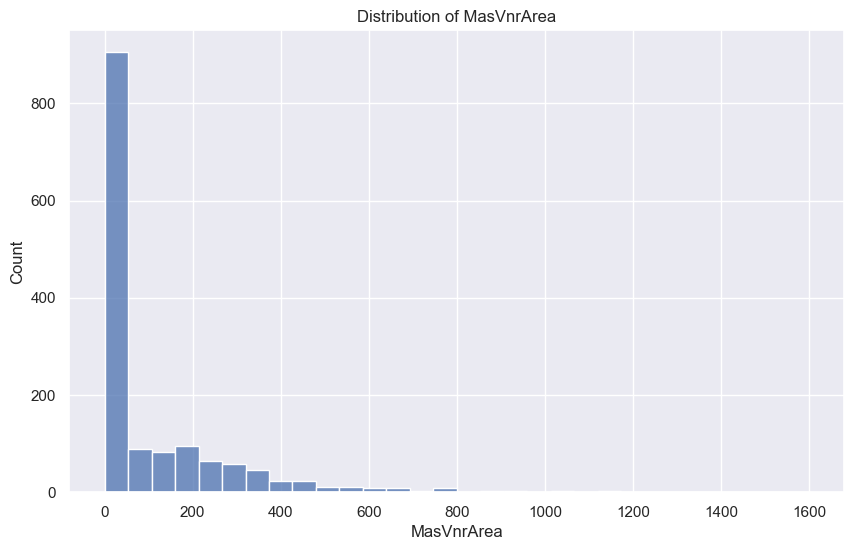

In [16]:
plt.figure(figsize=(10,6), dpi=100)
plt.title('Distribution of MasVnrArea')
sns.histplot(train['MasVnrArea'], kde=False, bins=30);

<b>Looks like this feature is very sparse. I will fill missing values with 0.</b>

In [17]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)

<b>Finally, let's check GarageYrBlt</b>

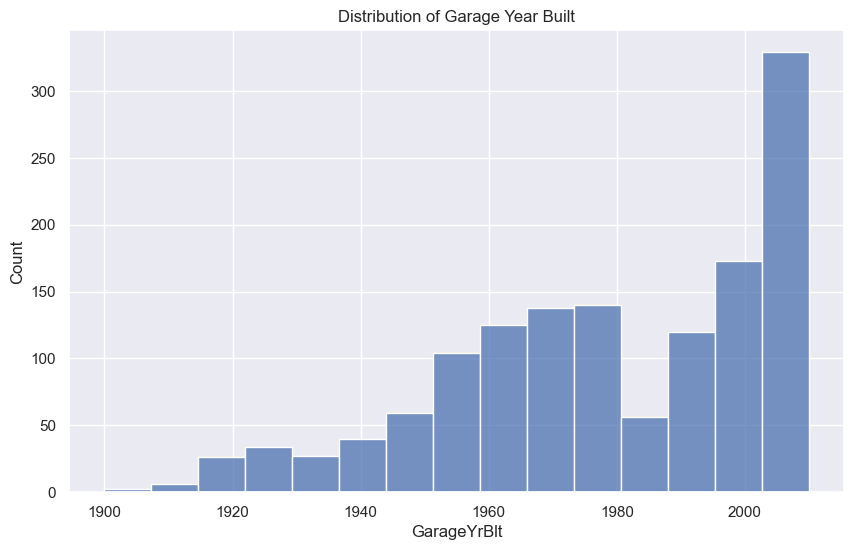

In [18]:
plt.figure(figsize=(10,6), dpi=100)
plt.title('Distribution of Garage Year Built')
sns.histplot(train['GarageYrBlt']);


<b>This one is a little tricky, because Year is not a feature that we can fill with a computed value. Let's take a look at the series again to see what we can do. Let's check a scatterplot of Year Built vs. Garage Year Built and see if we can just fill them with the same value.</b>

<Axes: xlabel='YearBuilt', ylabel='GarageYrBlt'>

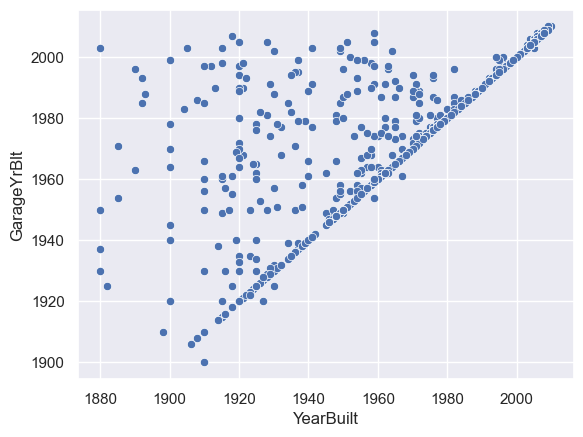

In [19]:
sns.scatterplot(x=train['YearBuilt'], y=train['GarageYrBlt'])


<b>This is interesting. It looks like there is a 1 to 1 correlation for some houses for Year Built and Garage Yr Built, but some years do not follow this trend. I wonder if those Garages built correlate with Year remodeled.</b>

<Axes: xlabel='YearRemodAdd', ylabel='GarageYrBlt'>

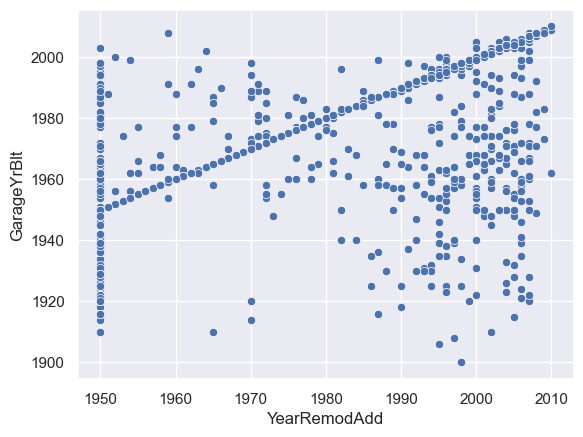

In [20]:
sns.scatterplot(x=train['YearRemodAdd'], y=train['GarageYrBlt'])


<b></b>

<Axes: xlabel='YearRemodAdd', ylabel='Count'>

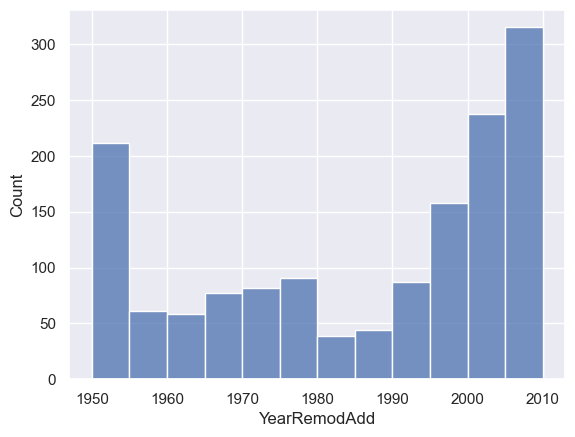

In [21]:
sns.histplot(train['YearRemodAdd'])

<b>I think what I am going to do is  replace the GarageYrBuilt missing values with Year Built.</b>

In [22]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['YearBuilt'] if train['YearBuilt'].equals(train['YearRemodAdd']) else train['YearRemodAdd'])


In [23]:
train['GarageYrBlt'].isnull().sum()


0

<b>Now it's time to handle missing categorical variables.</b>

In [24]:
categorical_missing.columns


Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [25]:
categorical_missing_percentage = (categorical_missing.isnull().sum() / len(train)) * 100
categorical_missing_percentage


BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
Electrical      0.068493
GarageType      5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64

<b>My initial thoughts are that I don't want to just drop these values, because I will be losing at the very least 5.5% of my dataset. To me, that is a significant loss. However, I am noticing that GarageType, GarageFinish,
GarageQual, and GarageCond all have the same percentage of missing values. Let's check these features out.</b>

In [26]:
train[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].describe()

,GarageType,GarageFinish,GarageQual,GarageCond
count,1379,1379,1379,1379
unique,6,3,5,5
top,Attchd,Unf,TA,TA
freq,870,605,1311,1326


In [27]:
train[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].value_counts()

GarageType  GarageFinish  GarageQual  GarageCond
Attchd      RFn           TA          TA            361
Detchd      Unf           TA          TA            293
Attchd      Fin           TA          TA            272
            Unf           TA          TA            218
BuiltIn     Fin           TA          TA             58
            RFn           TA          TA             24
Detchd      RFn           TA          TA             19
            Unf           Fa          Fa             17
                                      TA             16
                          TA          Fa             13
            Fin           TA          TA             12
Basment     Unf           TA          TA              7
CarPort     Unf           TA          TA              7
Basment     RFn           TA          TA              6
BuiltIn     Unf           TA          TA              5
Attchd      RFn           Gd          TA              5
Detchd      Unf           Fa          Po              4

In [28]:
garage_missing_count = train.loc[(train['GarageType'].isnull()) & (train['GarageFinish'].isnull()) & (train['GarageQual'].isnull()) & (train['GarageCond'].isnull())].shape[0]
print(f"Number of rows with missing values in GarageType, GarageFinish, GarageQual, or GarageCond: {garage_missing_count}")


Number of rows with missing values in GarageType, GarageFinish, GarageQual, or GarageCond: 81


In [29]:
print(f"Number of rows with missing values in GarageType: {train['GarageType'].isnull().sum()}")

Number of rows with missing values in GarageType: 81


<b>Looks like these values are missing at the same locations. I'm going to go ahead and fill these values with the mode of their respective column.</b>

In [30]:
for column in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
  train[column] = train[column].fillna(train[column].mode()[0])


<b>Let's see what else we are missing.</b>

In [31]:
missing_columns = train.columns[train.isnull().any()]
categorical_missing = train[missing_columns].select_dtypes(exclude=np.number)
categorical_missing.columns

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical'],
      dtype='object')

In [32]:
categorical_missing_percentage = (categorical_missing.isnull().sum() / len(train)) * 100
print(categorical_missing_percentage)


BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
Electrical      0.068493
dtype: float64


<b>These percentages are pretty small, so I feel a little more confident replacing these with the mode of their columns. I am just now realizing that I can't necessarily drop these columns because if my test dataset is missing any values too then I will not be able to drop those.</b>

In [33]:
for column in categorical_missing.columns:
  train[column] = train[column].fillna(train[column].mode()[0])

<b>Let's verify we got rid of all our missing data.</b>

In [34]:
train.isnull().sum().sum()


0

<b>Now I need to take a note of what I did for each missing value, because I will need to replicate this with my test dataset:
<ul>
<li>Dropped as feature: Alley, MasVnrType, FireplaceQu, PooQC, Fence, and MiscFeature.</li>
<li>Replaced with mean: LotFrontage</li>
<li>Filled with 0: MasVnrArea </li>
<li>Replaced with Mode: BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2,
       Electrical, GarageType, GarageFinish,GarageQual, GarageCond</li>
<li>Replaced with different year: GarageYrBlt</li>
</ul> </b>

<b>I now need to clean my Test data set. I will try to follow the same procedures to keep my dataframes consistent.</b>

<b>First drop same columns as Training dataset</b>

In [35]:
test = test.drop(columns=['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])

<b>Replace missing values of LotFrontage with mean.</b>

In [36]:
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mean())


<b>Fill missing values of MasVnrArea with 0.</b>

In [37]:
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)

<b>Replace with the mode: BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, GarageType, GarageFinish,GarageQual, GarageCond</b>

In [38]:
for column in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
  test[column] = test[column].fillna(test[column].mode()[0])


<b>Replace missing values of GarageYrBlt with either Year Built or Year Remodeled</b>

In [39]:
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['YearBuilt'] if test['YearBuilt'].equals(test['YearRemodAdd']) else test['YearRemodAdd'])


<b>Now we need to check for any additional missing values.</b>

In [40]:
test.isnull().sum()


MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 73, dtype: int64

<b>Looks like theres a few columns with additional missing values. Let's tackle those columns 1 by 1, working on numerical first followed by categorical.</b>

In [41]:
missing_columns = test.columns[test.isnull().any()]
print(missing_columns)

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea',
       'SaleType'],
      dtype='object')


In [42]:
numerical_columns = test[missing_columns].select_dtypes(include=np.number).columns.tolist()
categorical_columns = test[missing_columns].select_dtypes(exclude=np.number).columns.tolist()


In [43]:
print(numerical_columns)


['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']


<b>I think that these values are few enough that I can replace them with the mode. I am doing this because if any of these values are discrete then I do not want to change the data type of my column.</b>

In [44]:
for column in numerical_columns:
  test[column] = test[column].fillna(test[column].mode()[0])


In [45]:
missing_columns = test.columns[test.isnull().any()]
numerical_columns = test[missing_columns].select_dtypes(include=np.number).columns.tolist()
print(numerical_columns)

[]


<b>Now let's check categorical missing values.</b>

In [46]:
categorical_missing = test[missing_columns].select_dtypes(exclude=np.number)
categorical_missing_percentage = (categorical_missing.isnull().sum() / len(test)) * 100
print(categorical_missing_percentage)


MSZoning       0.27416
Utilities      0.13708
Exterior1st    0.06854
Exterior2nd    0.06854
KitchenQual    0.06854
Functional     0.13708
SaleType       0.06854
dtype: float64


<b>There are so few missing values that I feel I can replace them with the mode and the distribution will not change at all.</b>

In [47]:
for column in categorical_missing.columns:
  test[column] = test[column].fillna(test[column].mode()[0])


<b>Final check for missing values.</b>

In [48]:
test.isnull().sum().sum()


0

<b>Perfect, our testing dataset is now clean.</b>

# 2. Exploratory Data Analysis

<b>Let's start by taking a look at the frequency distribution of Sale Price in our dataset.</b>

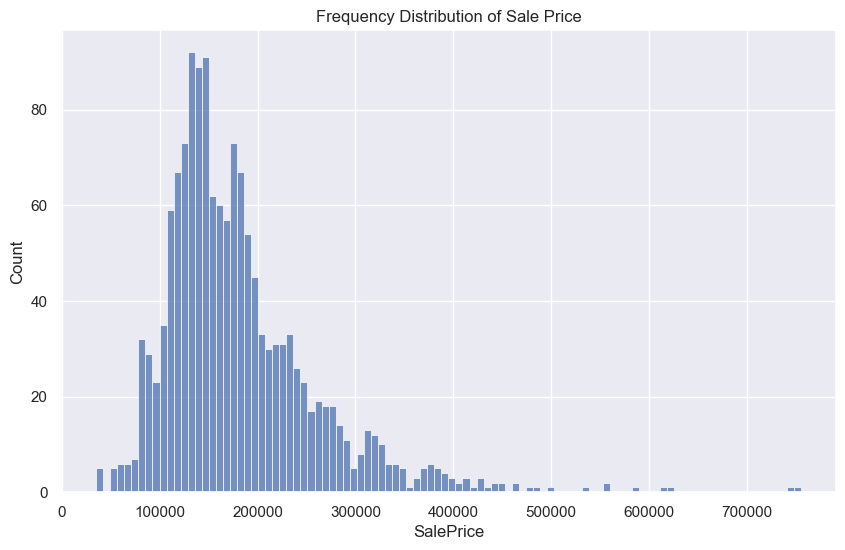

In [49]:
plt.figure(figsize=(10,6), dpi=100)
plt.title("Frequency Distribution of Sale Price")
sns.histplot(train['SalePrice'], bins=100);

<b>It looks like there are a few outliers in our dataset. However, I tested and submitted a model with removing these outliers, and performance actually got worse, so I have decided retroactively to keep them. My hypothesis is that these outliers aren't necessarily unexplainable, and can be in fact predicted with features.</b>

<b>Let's start by looking the correlations for our dataset.</b>

In [50]:
numerical_columns = train.select_dtypes(include=np.number).columns
correlations = train[numerical_columns].corr()['SalePrice'].sort_values(ascending=False)
print(correlations)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.475407
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


<b>It looks like we have a good amount of features with a high correlation with Sale Price. I think I will focus only on numerical features which have a greater than 0.40 correlation.</b>

In [51]:
categorical_columns = train.select_dtypes(exclude=np.number).columns.tolist()
categorical_columns


['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

<b>This is going to look bad, but I am going to go ahead and plot a boxplot for each categorical variable with Sale Price. I am looking for plots where the mean Sale Price is significatly higher for some categories..</b>

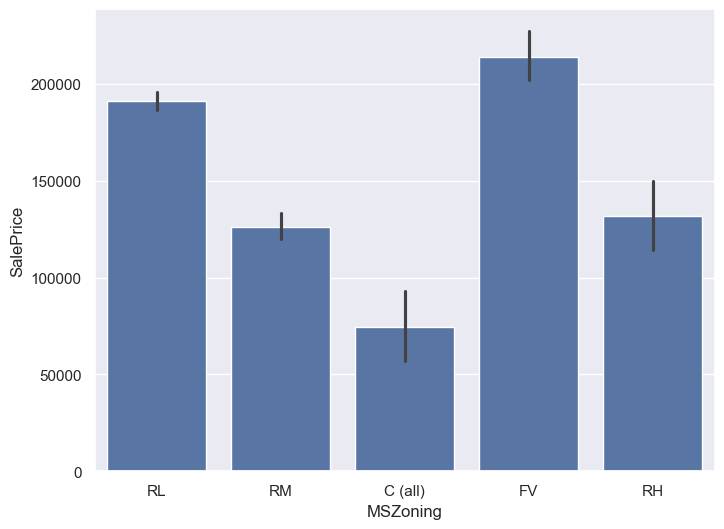

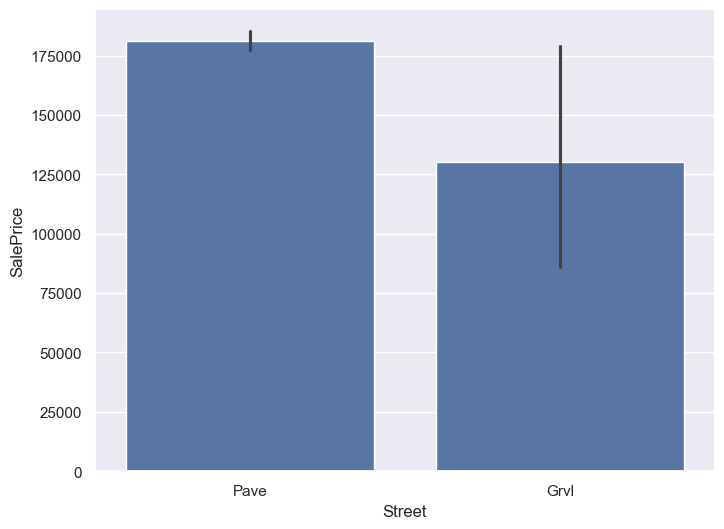

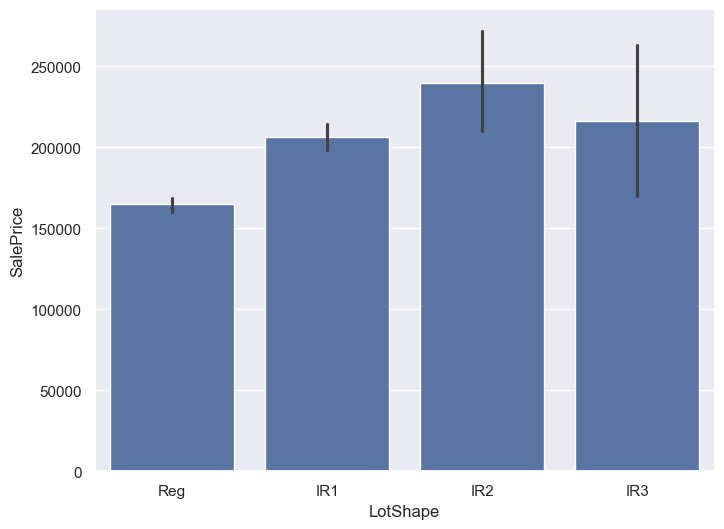

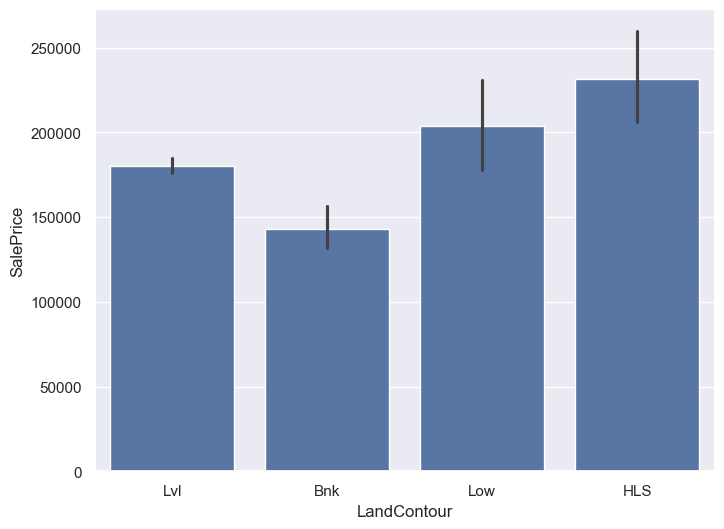

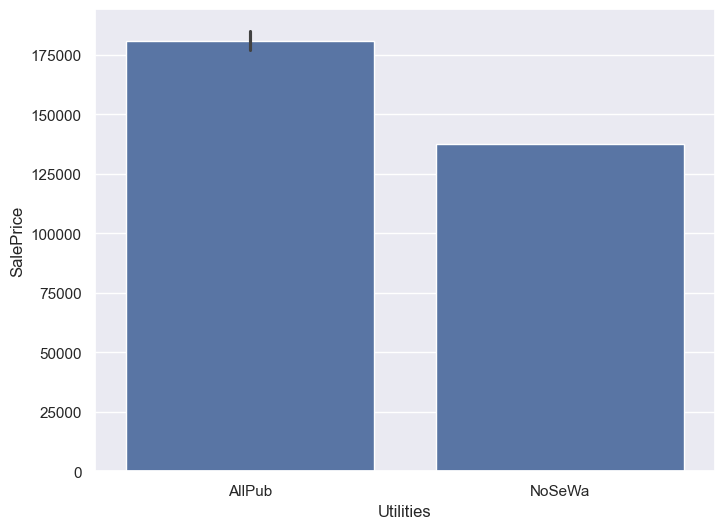

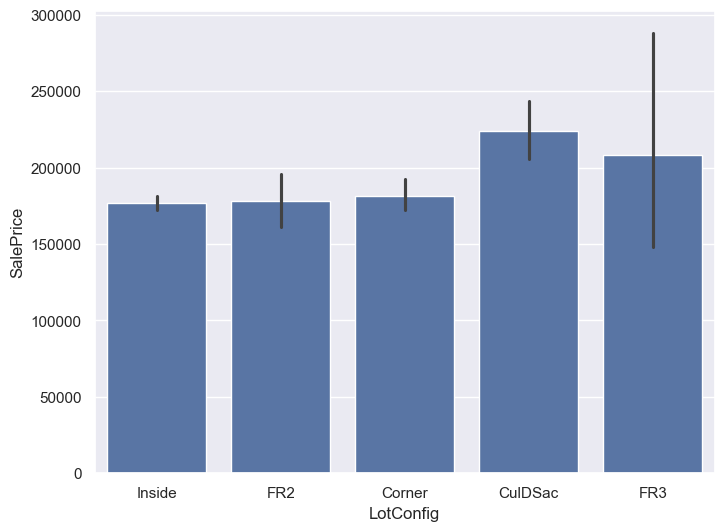

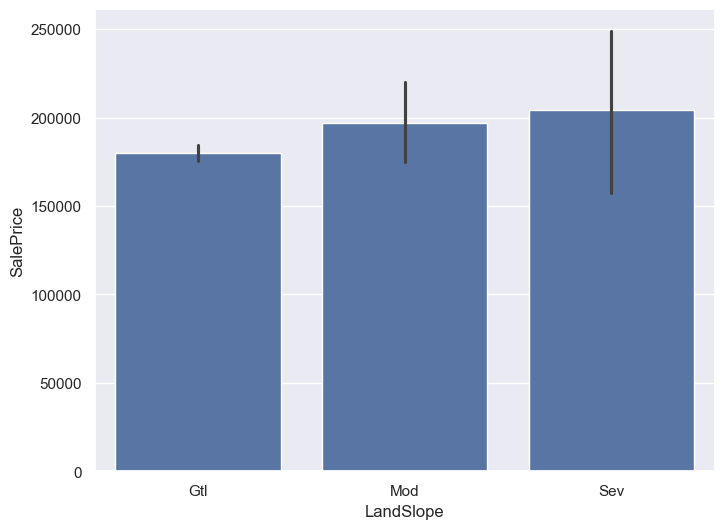

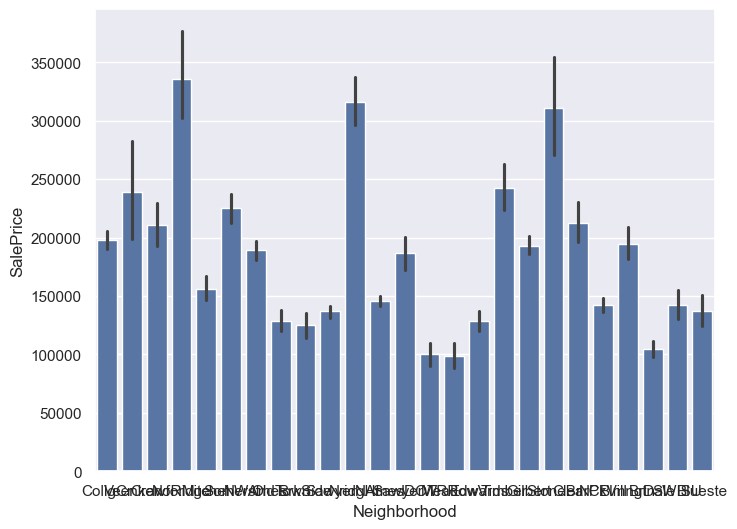

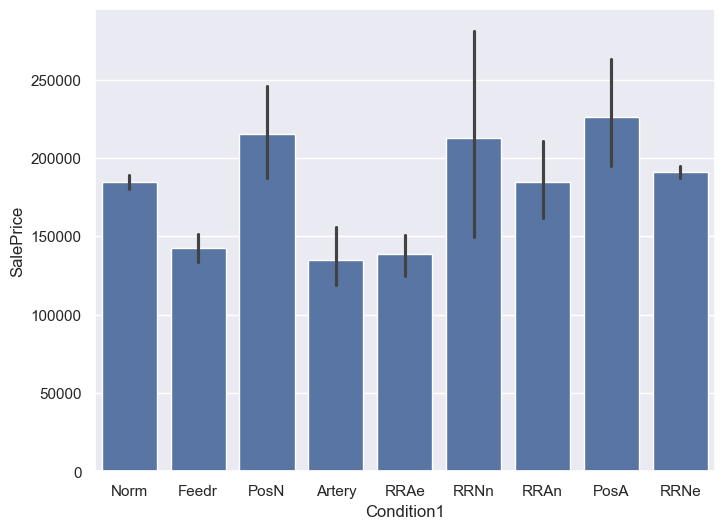

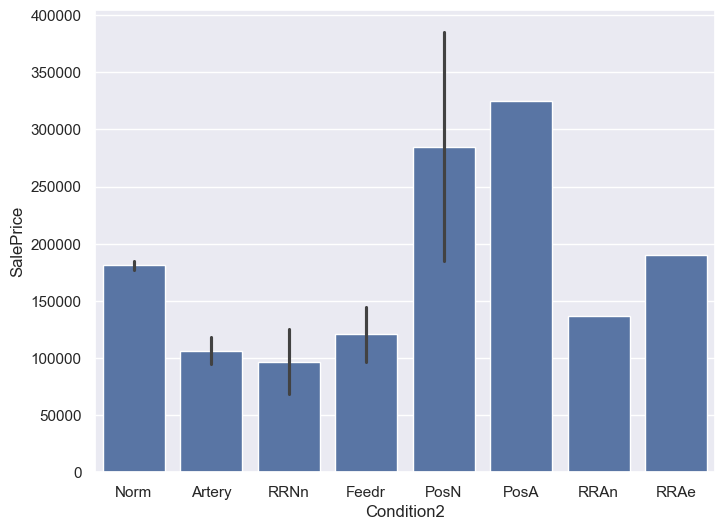

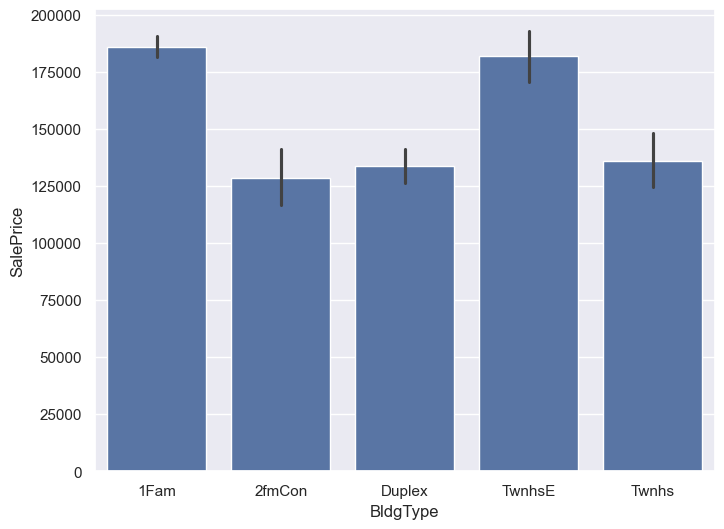

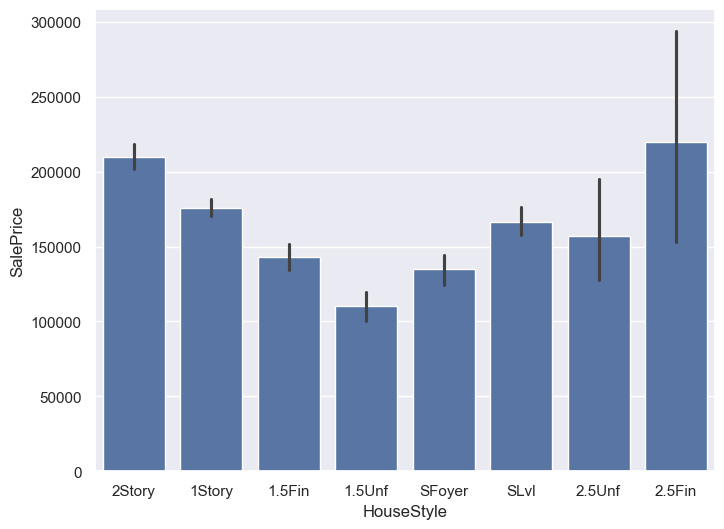

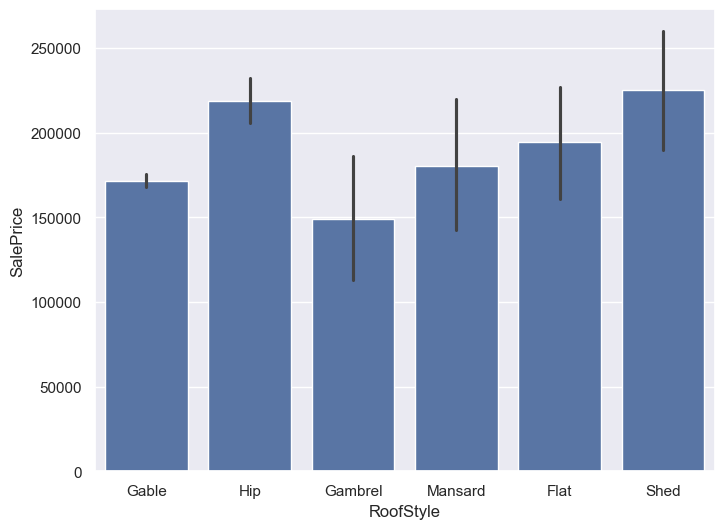

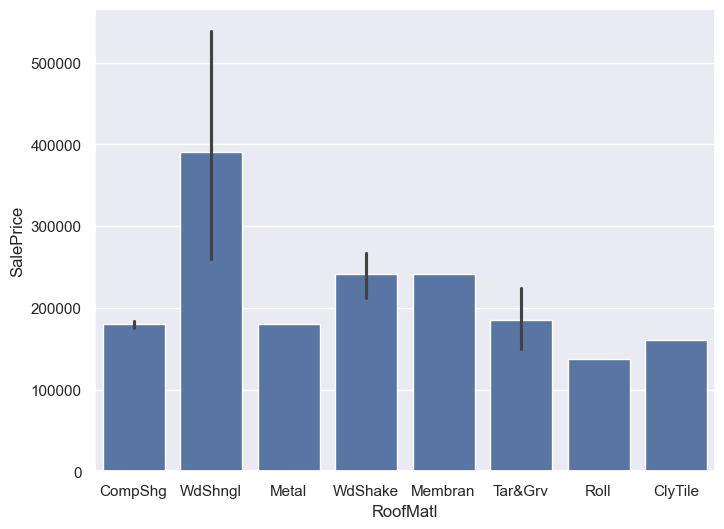

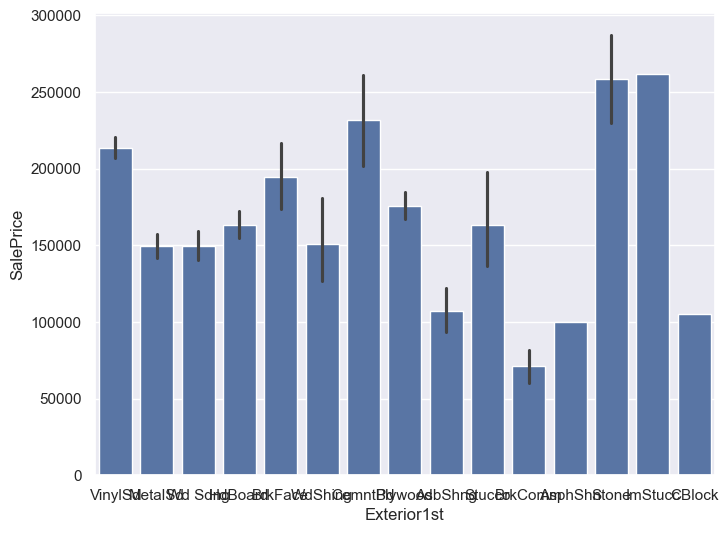

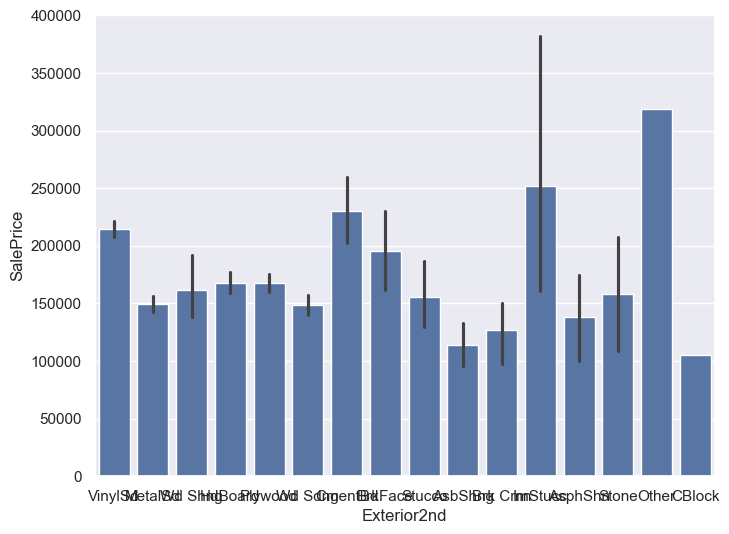

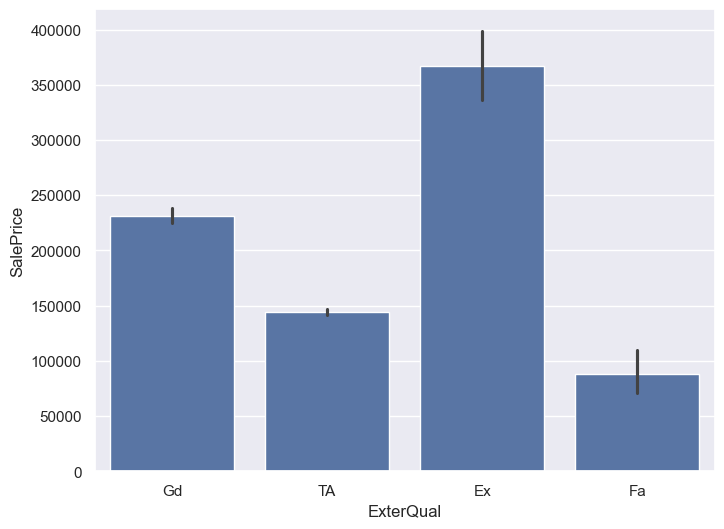

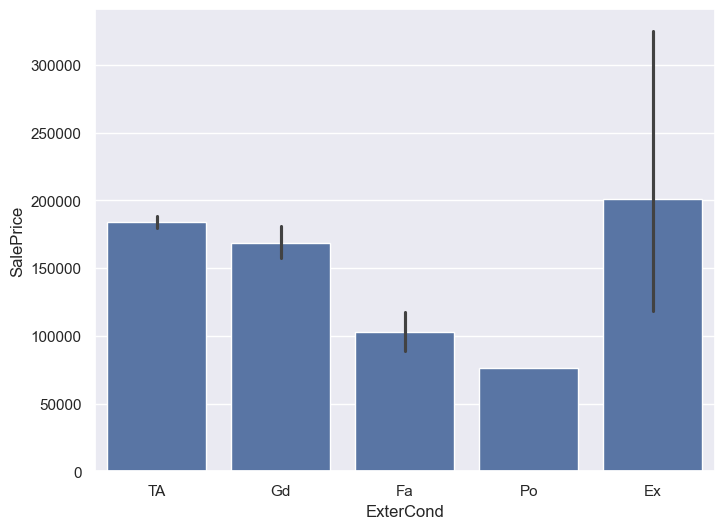

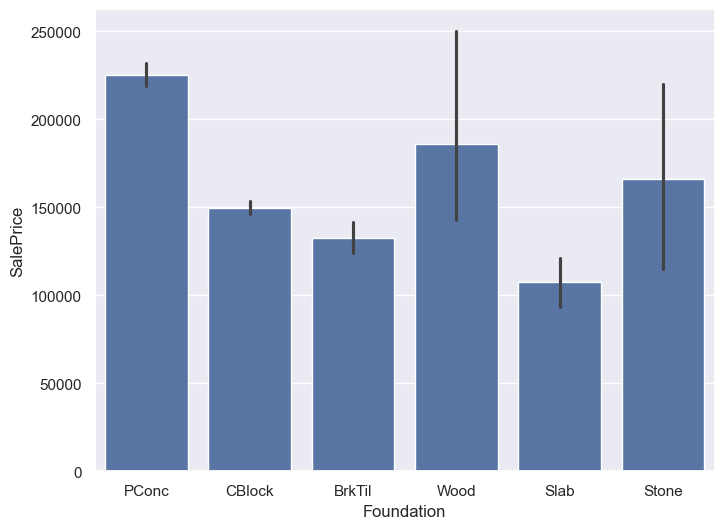

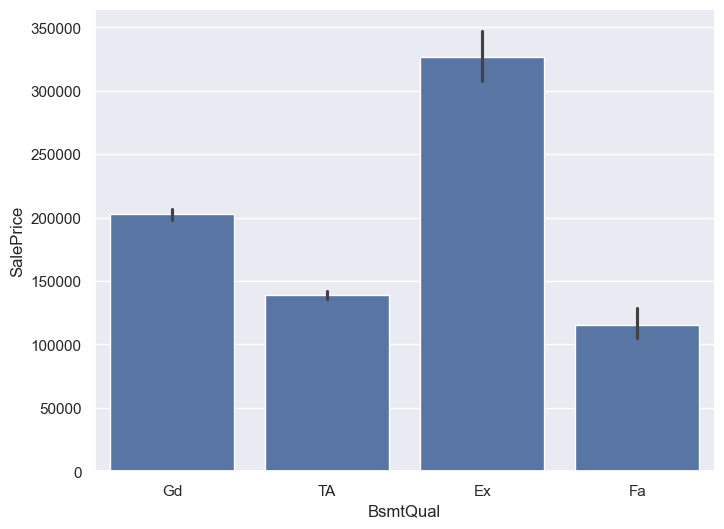

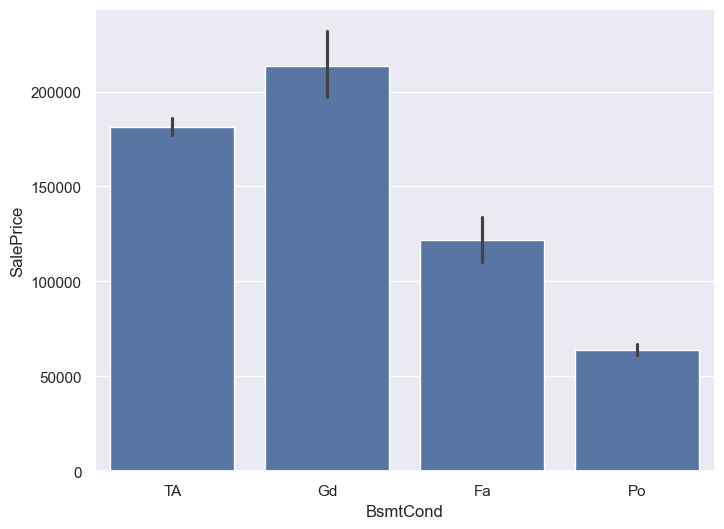

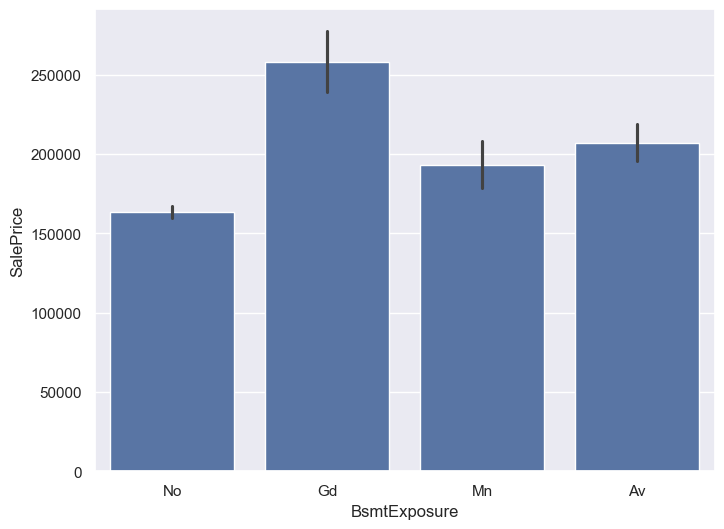

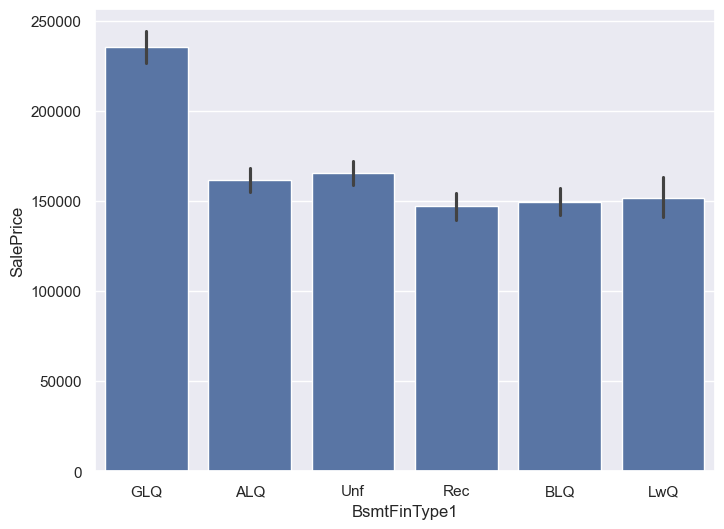

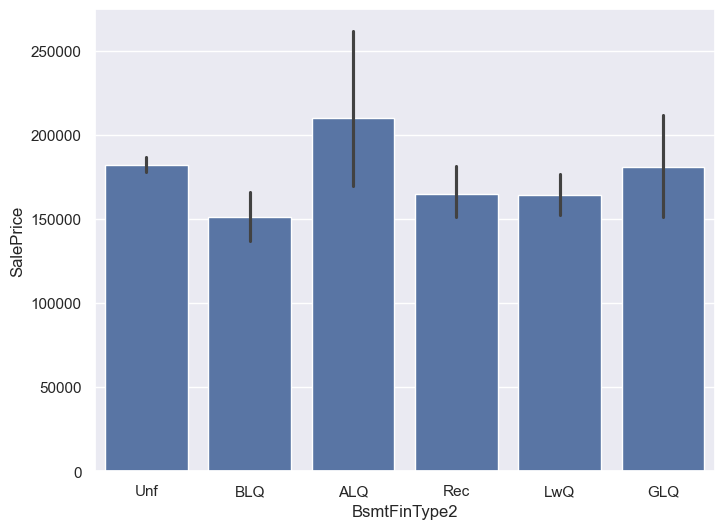

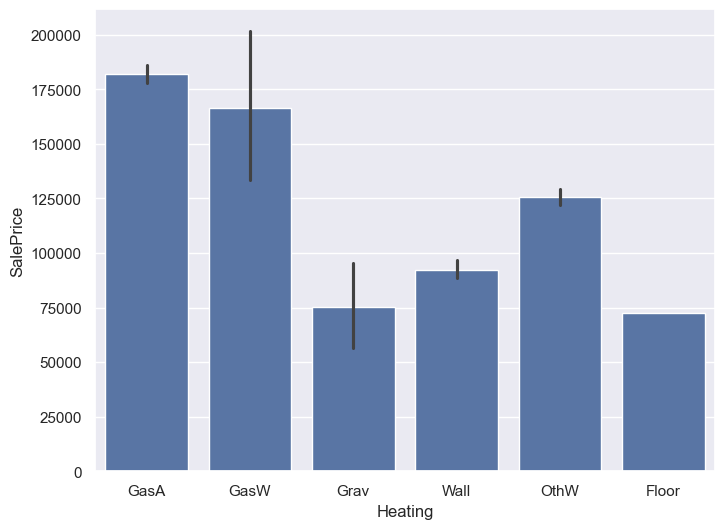

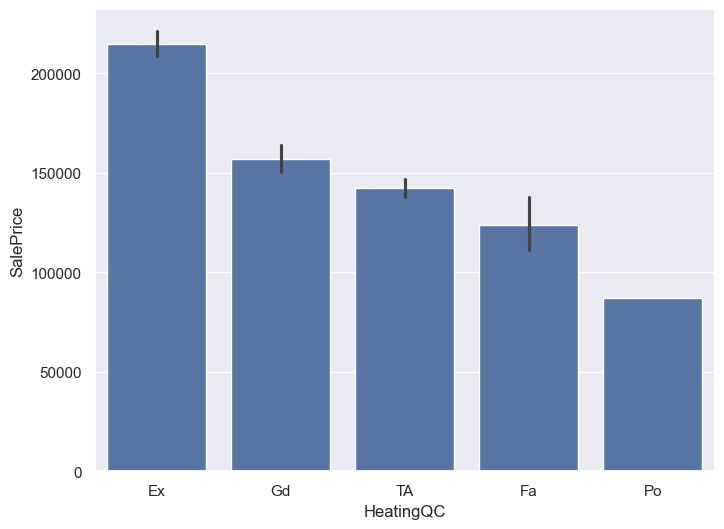

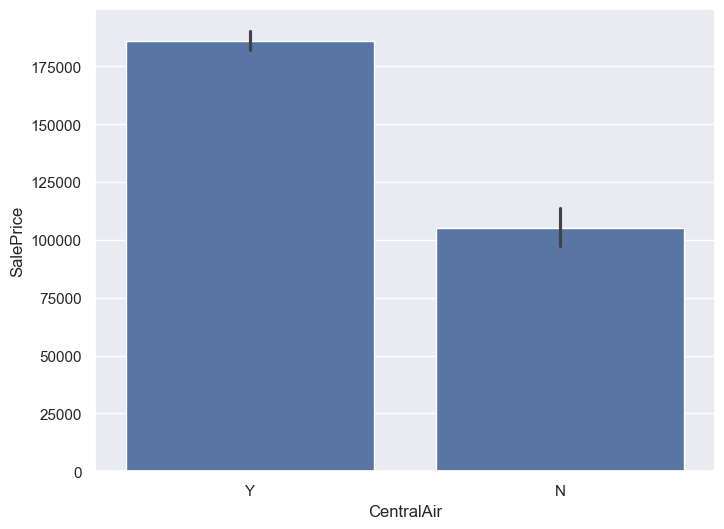

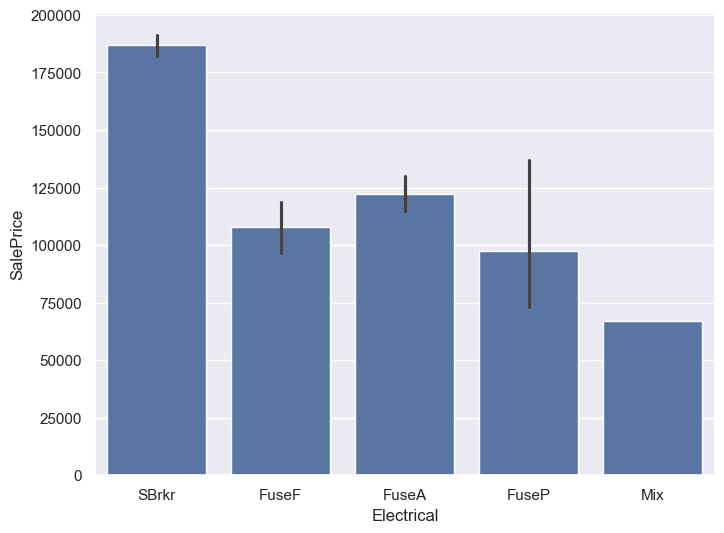

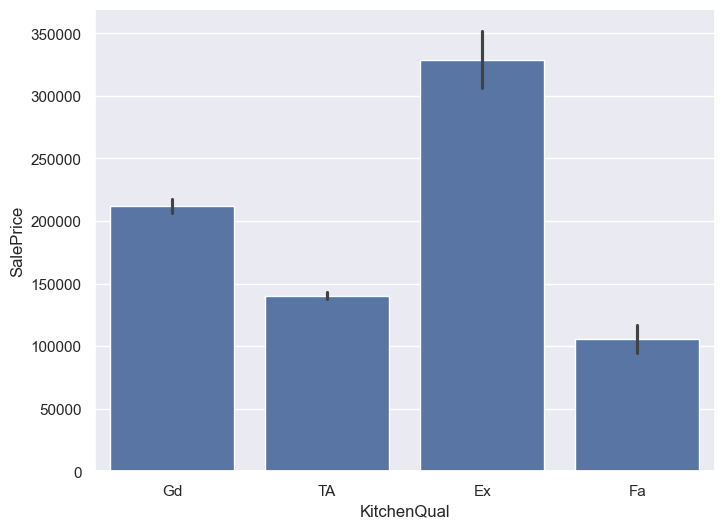

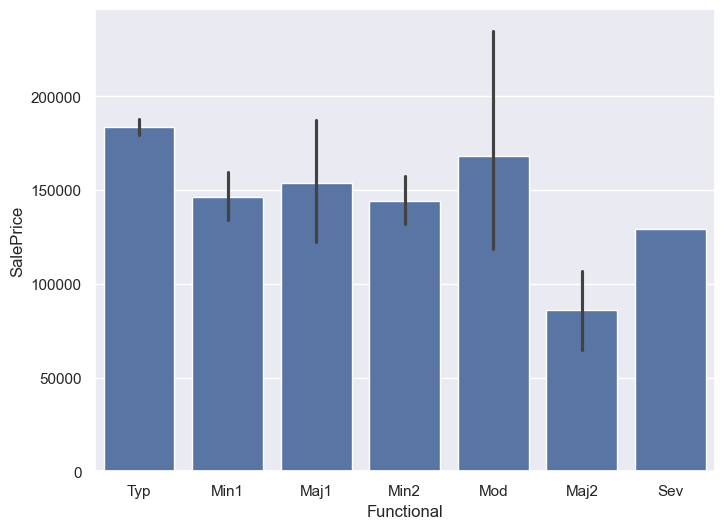

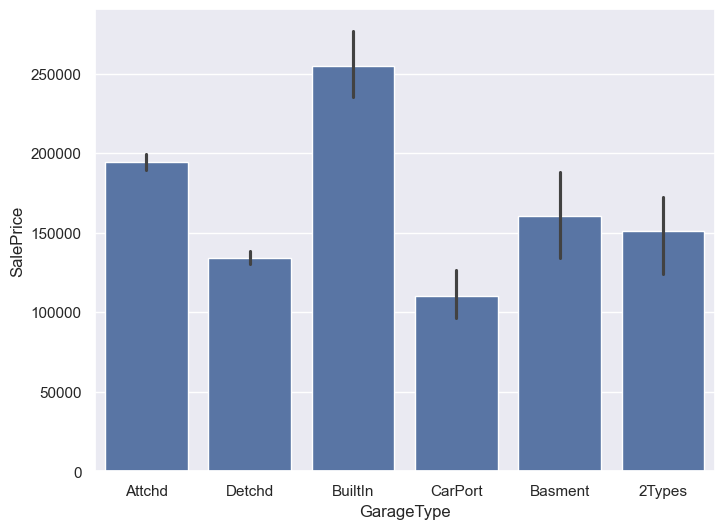

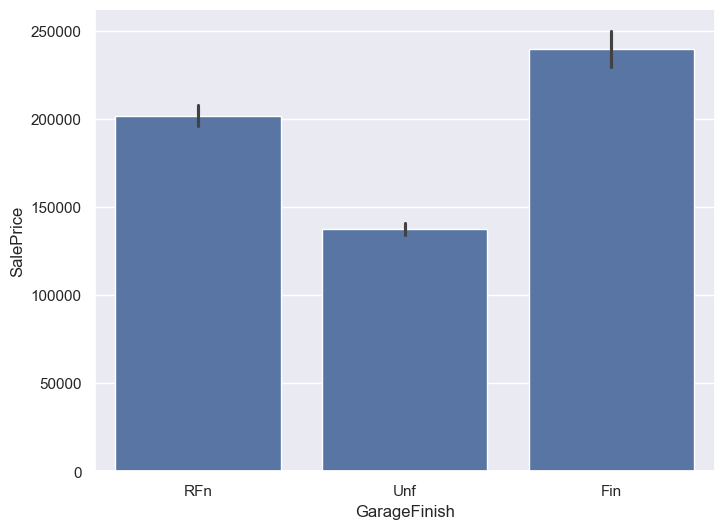

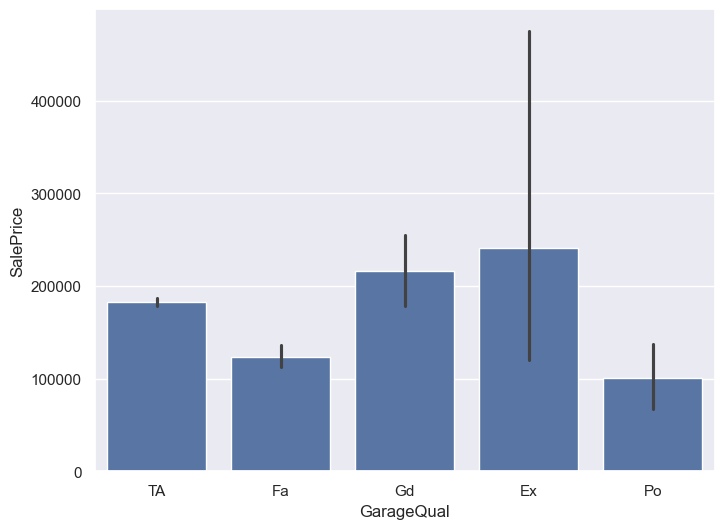

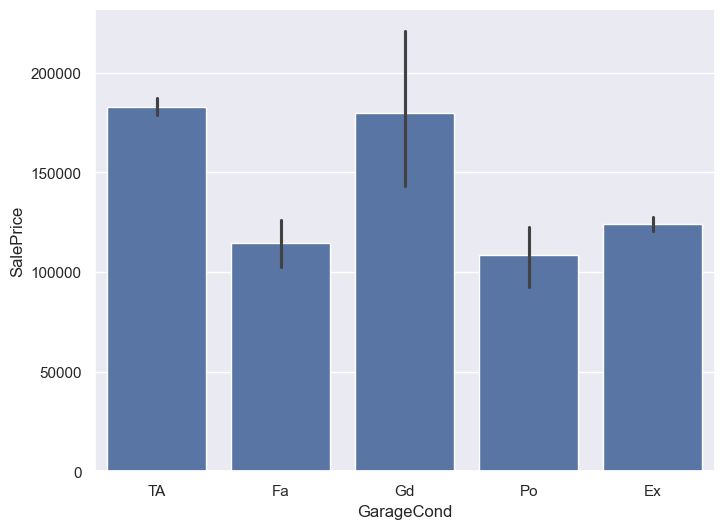

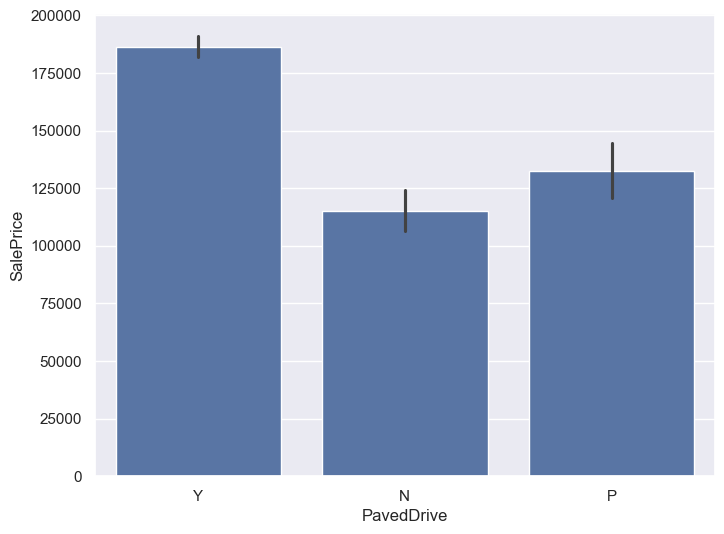

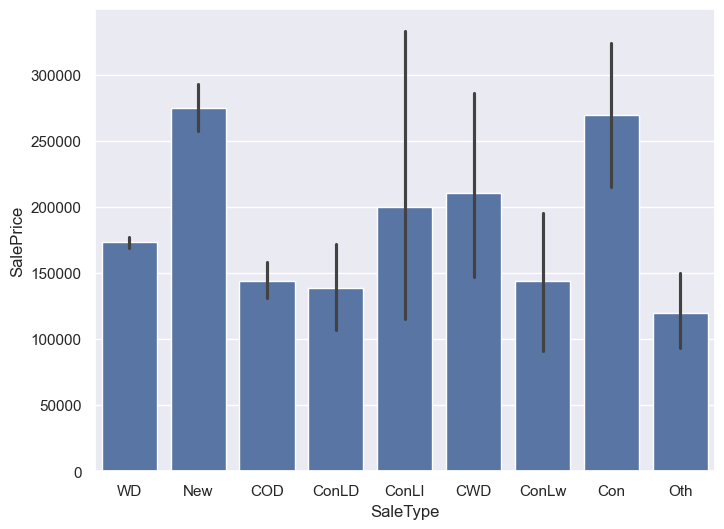

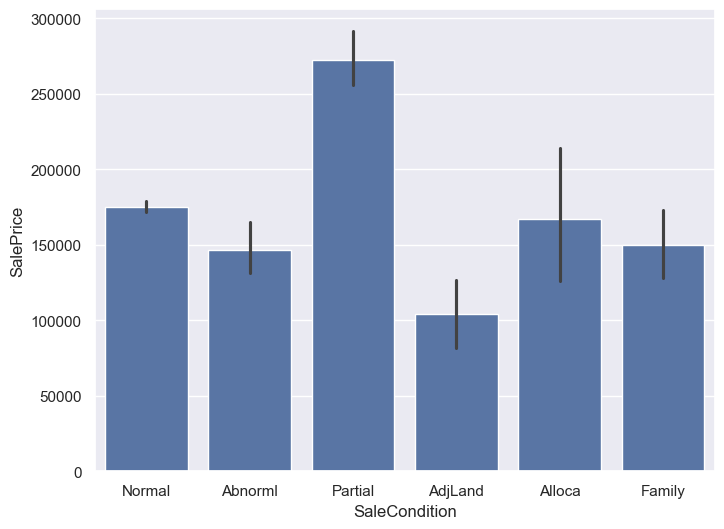

In [52]:
# Generate boxplots for each variable
for variable in categorical_columns:
  plt.figure(figsize=(8, 6))
  sns.barplot(x=variable, y='SalePrice', data=train)
  plt.show()


<b>Some features that stood out to me are: Street, Utilities, ExterQual, BasmtQual, BsmtCond, Heating, CentralAir, Electrical, KitchenQual.

These features looked either easy to dummify because they had few unique values, or they had a significant different in Sale Price for 1 or more categories. I will experiment with these first, in no particular order.</b>

# 3. Features

<b>I am going to start adding dummy variables, so I want to go ahead and concatenate my datasets so that there will be some consistency in the final output. I will re-split my datasets later.</b>

In [53]:
data = pd.concat([train, test])

In [54]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,NaN
2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN


<b>I want to go ahead and reduce my dataframes features now, I will add more features later.</b>

In [55]:
categorical_columns = data.select_dtypes(exclude=np.number).columns
numerical_columns = data.select_dtypes(include=np.number).columns

In [56]:
numerical_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [57]:
correlations = train[numerical_columns].corr()['SalePrice'].sort_values(ascending=False)
correlations = correlations > 0.4

In [58]:
correlations_list = correlations[correlations == True].index.tolist()

In [59]:
data_original = pd.get_dummies(data)
data_correlated = data[correlations_list + ['Street', 'Utilities', 'ExterQual', 'BsmtQual', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'KitchenQual']]

In [60]:
data_correlated

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,Fireplaces,Street,Utilities,ExterQual,BsmtQual,BsmtCond,Heating,CentralAir,Electrical,KitchenQual
Id,,,,,,,,,,,,,,,,,,,,,
1,208500.0,7,1710,2.0,548.0,856.0,856,2,8,2003,...,0,Pave,AllPub,Gd,Gd,TA,GasA,Y,SBrkr,Gd
2,181500.0,6,1262,2.0,460.0,1262.0,1262,2,6,1976,...,1,Pave,AllPub,TA,Gd,TA,GasA,Y,SBrkr,TA
3,223500.0,7,1786,2.0,608.0,920.0,920,2,6,2001,...,1,Pave,AllPub,Gd,Gd,TA,GasA,Y,SBrkr,Gd
4,140000.0,7,1717,3.0,642.0,756.0,961,1,7,1915,...,1,Pave,AllPub,TA,TA,Gd,GasA,Y,SBrkr,Gd
5,250000.0,8,2198,3.0,836.0,1145.0,1145,2,9,2000,...,1,Pave,AllPub,Gd,Gd,TA,GasA,Y,SBrkr,Gd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,NaN,4,1092,0.0,0.0,546.0,546,1,5,1970,...,0,Pave,AllPub,TA,TA,TA,GasA,Y,SBrkr,TA
2916,NaN,4,1092,1.0,286.0,546.0,546,1,6,1970,...,0,Pave,AllPub,TA,TA,TA,GasA,Y,SBrkr,TA
2917,NaN,5,1224,2.0,576.0,1224.0,1224,1,7,1960,...,1,Pave,AllPub,TA,TA,TA,GasA,Y,SBrkr,TA


<b>Now I need to figure out how to create dummy variables for my categorical variables.</b>

In [61]:
# data_original = pd.get_dummies(data_original, columns=['Street', 'Utilities', 'ExterQual', 'BsmtQual', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'KitchenQual'])
data_correlated = pd.get_dummies(data_correlated, columns=['Street', 'Utilities', 'ExterQual', 'BsmtQual', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'KitchenQual'])


# 4. Model Training

In [62]:
def evaluation(predictions, observations):
    rmsle = np.sqrt(mean_squared_error(np.log(predictions), np.log(observations)))
    r2 = r2_score(observations, predictions)
    print(f'RMSLE: {rmsle}\nR2: {r2}')

In [63]:
def model_plot(predictions, observations, title):
    joined_df = pd.DataFrame({'Predictions': predictions, 'Actual': observations})
    joined_df.reset_index(inplace=True)
    joined_df.drop('Id', axis=1)
    plt.figure(figsize=(25,10))
    sns.lineplot(data=joined_df, x=joined_df.index, y="Actual", label="Actual")
    sns.lineplot(data=joined_df, x=joined_df.index, y="Predictions", label="Predictions")
    plt.title(f'{title}\nPredictions vs Observations\nValidation Data', size=22)
    plt.xlabel('Observation #', size=22)
    plt.ylabel('Sale Price', size=22)
    plt.legend()
    plt.show()



In [64]:
def create_submission(model, filename):
    test = data_original.iloc[1460:]
    test = test.drop('SalePrice', axis=1)
    predictions = model.predict(test)
    submission = pd.DataFrame(predictions, columns=['SalePrice'], index=range(1461, 1461 + len(predictions)))
    submission.to_csv(f'{filename}.csv', index_label='Id')

In [65]:
models = {}

In [66]:
model_predictions = {}

<b>I will first test a Linear Regression model using only numerical features with a correlation greater than 0.4</b>

In [67]:
first_nan = data_correlated['SalePrice'].isna().idxmax()
first_nan

1461

In [68]:
train = data_correlated.iloc[:1460]
train

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
Id,,,,,,,,,,,,,,,,,,,,,
1,208500.0,7,1710,2.0,548.0,856.0,856,2,8,2003,...,True,False,False,False,False,True,False,False,True,False
2,181500.0,6,1262,2.0,460.0,1262.0,1262,2,6,1976,...,True,False,False,False,False,True,False,False,False,True
3,223500.0,7,1786,2.0,608.0,920.0,920,2,6,2001,...,True,False,False,False,False,True,False,False,True,False
4,140000.0,7,1717,3.0,642.0,756.0,961,1,7,1915,...,True,False,False,False,False,True,False,False,True,False
5,250000.0,8,2198,3.0,836.0,1145.0,1145,2,9,2000,...,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,175000.0,6,1647,2.0,460.0,953.0,953,2,7,1999,...,True,False,False,False,False,True,False,False,False,True
1457,210000.0,6,2073,2.0,500.0,1542.0,2073,2,7,1978,...,True,False,False,False,False,True,False,False,False,True
1458,266500.0,7,2340,1.0,252.0,1152.0,1188,2,9,1941,...,True,False,False,False,False,True,False,False,True,False


In [69]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=7)

In [70]:
model = LinearRegression()

In [71]:
model.fit(X_train, y_train)

LinearRegression()

In [72]:
predictions = model.predict(X_train)

In [73]:
rmse = np.sqrt(mean_squared_error(y_train, predictions))
r2 = r2_score(y_train, predictions)
print(f"RMSE: {rmse}")
print(f'R2: {r2}')


RMSE: 34596.012601010596
R2: 0.8092570590642919


In [74]:
predictions = model.predict(X_test)

In [75]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print(f"RMSE: {rmse}")
print(f'R2: {r2}')

RMSE: 31538.02632592533
R2: 0.8448796893981857


<b>Let's try to add all numerical features.</b>

In [76]:
train = data_original.iloc[:1460]
train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,False,True,False,False,False,False,True,False
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,False,True,False,False,False,False,True,False
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,False,True,False,False,False,False,True,False
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,False,True,True,False,False,False,False,False
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,...,False,False,False,True,False,False,False,False,True,False
1457,20,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,...,False,False,False,True,False,False,False,False,True,False
1458,70,66.0,9042,7,9,1941,2006,0.0,275.0,0.0,...,False,False,False,True,False,False,False,False,True,False


In [77]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=7)

In [78]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, predictions))
r2 = r2_score(y_train, predictions)
print(f"RMSE: {rmse}")
print(f'R2: {r2}')


RMSE: 19434.511963555087
R2: 0.939807322856294


In [79]:
predictions = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print(f"RMSE: {rmse}")
print(f'R2: {r2}')

RMSE: 38199.13999292416
R2: 0.7724342945185083


In [80]:
y_test

Id
607     152000.0
1211    189000.0
493     172785.0
411      60000.0
397     123000.0
          ...   
1310    179200.0
1230    127000.0
713     189000.0
109     115000.0
1035    119750.0
Name: SalePrice, Length: 219, dtype: float64

In [81]:
predictions

array([144717.53019652, 200149.0477963 , 187888.53018871, 126649.30371846,
       118245.47366579, 330527.04170502, 128878.29740667, 118746.34123984,
        76200.92820019, 113063.52342163, 226650.53117913, 175690.21921405,
       108083.77379951, 192790.47498064, 193892.25820819, 176275.00445276,
       248269.38092174, 156329.07532448, 138777.73585166, 173072.10397249,
       188586.63873741, 131368.85090457, 124347.83751439, 247018.6965592 ,
       305643.37372303, 164893.05166327, 101748.32553064, 174557.92008422,
       230617.40112441, 124023.26078162, 174799.4044554 , 262405.24636076,
       273482.28798125, 247527.08741736, 177432.22224656, 282576.34663869,
       155522.63794779, 135819.40362658, 253619.30964073, 204194.74912439,
       110070.3477227 , 189825.91890565, 156715.93103125, 167457.50570336,
       296793.08870663, 220633.72413317, 200030.8562604 , 189657.32776786,
       264223.12008349, 198464.34636633, 293354.22126729, 173632.93698901,
       179282.91174491, 2

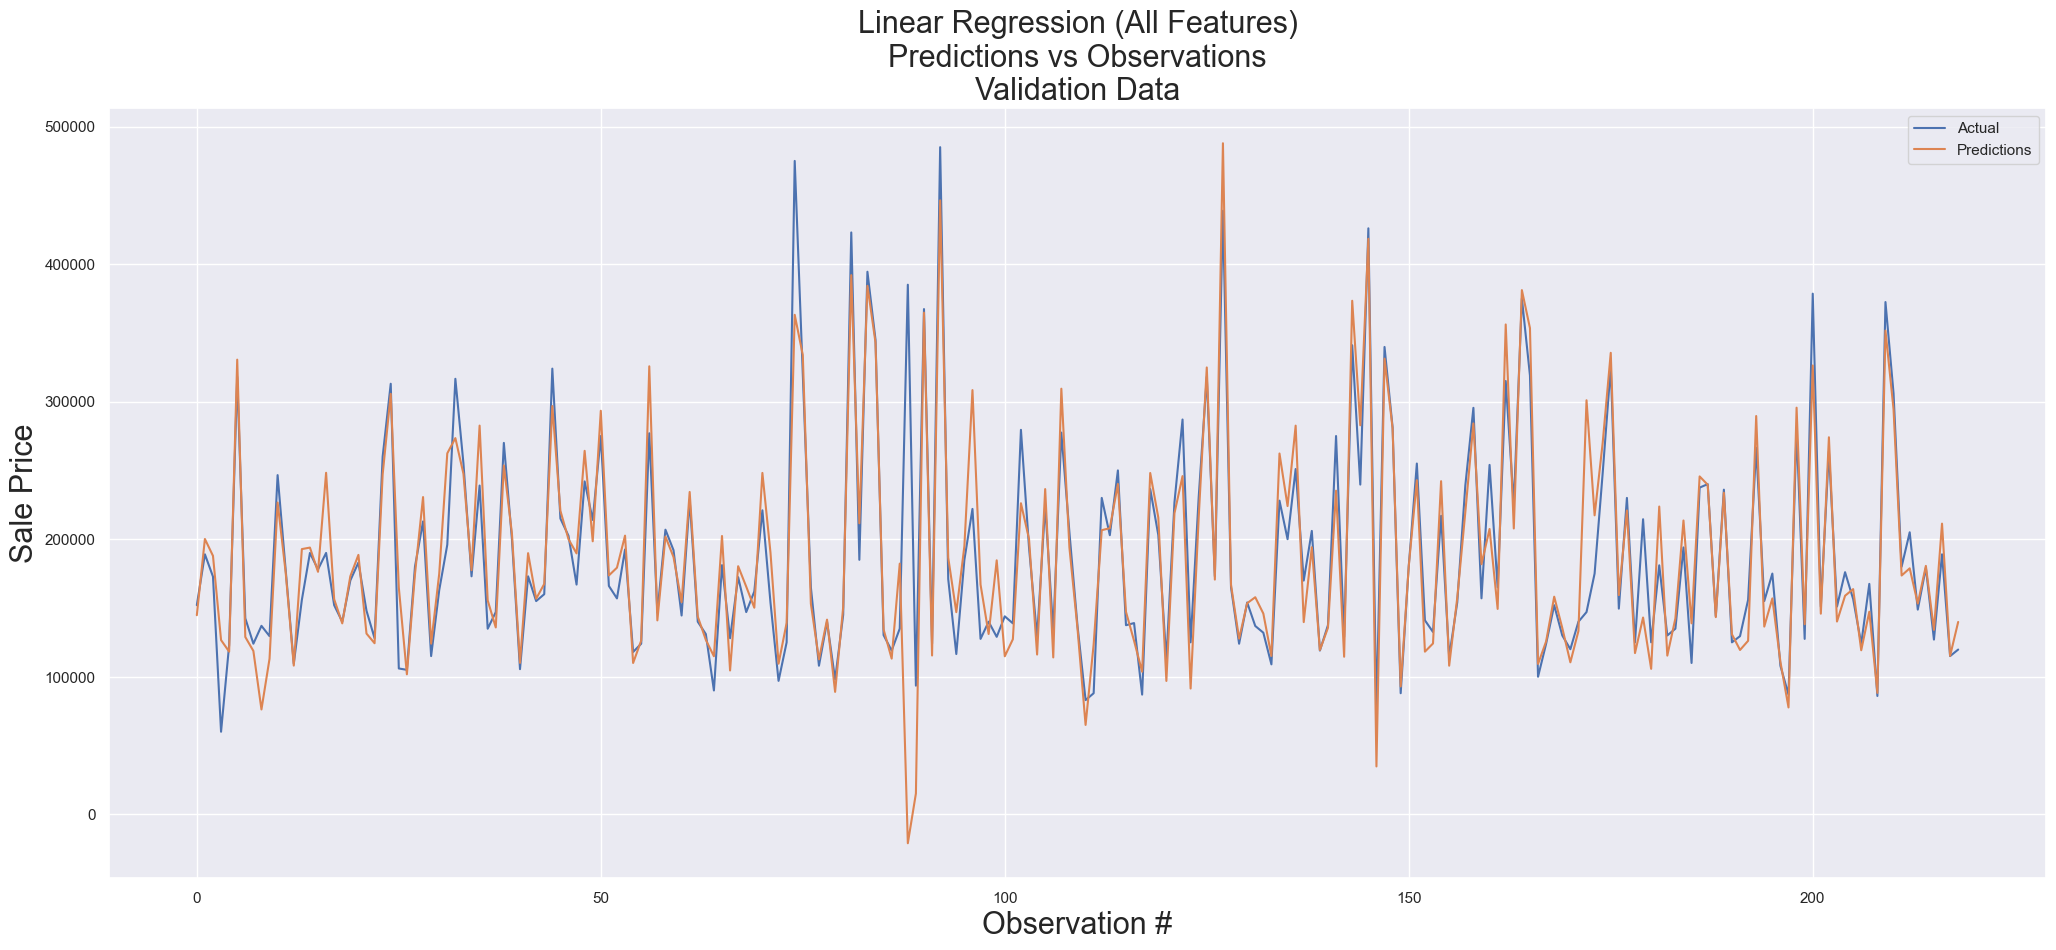

In [82]:
model_plot(predictions, y_test, "Linear Regression (All Features)");

<b>Random Forest</b>

In [83]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 50],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [5, 8, 10, 12],
    'n_estimators': [100, 128, 150, 200],
    'random_state': [1, 7, 11, 42]
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 1)

In [84]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 384 candidates, totalling 1152 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 20, 50],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 8, 10, 12],
                         'n_estimators': [100, 128, 150, 200],
                         'random_state': [1, 7, 11, 42]},
             verbose=1)

In [85]:
best_grid = grid_search.best_params_
best_grid

{'bootstrap': True,
 'max_depth': 50,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 150,
 'random_state': 11}

In [86]:
models['RF'] = RandomForestRegressor(n_estimators=150, max_depth=50, min_samples_leaf=2, min_samples_split=5, random_state=11)
models['RF'].fit(X_train, y_train)
model_predictions['RF'] = models['RF'].predict(X_test)
evaluation(model_predictions['RF'], y_test)

RMSLE: 0.12396552065229018
R2: 0.9066421022061006


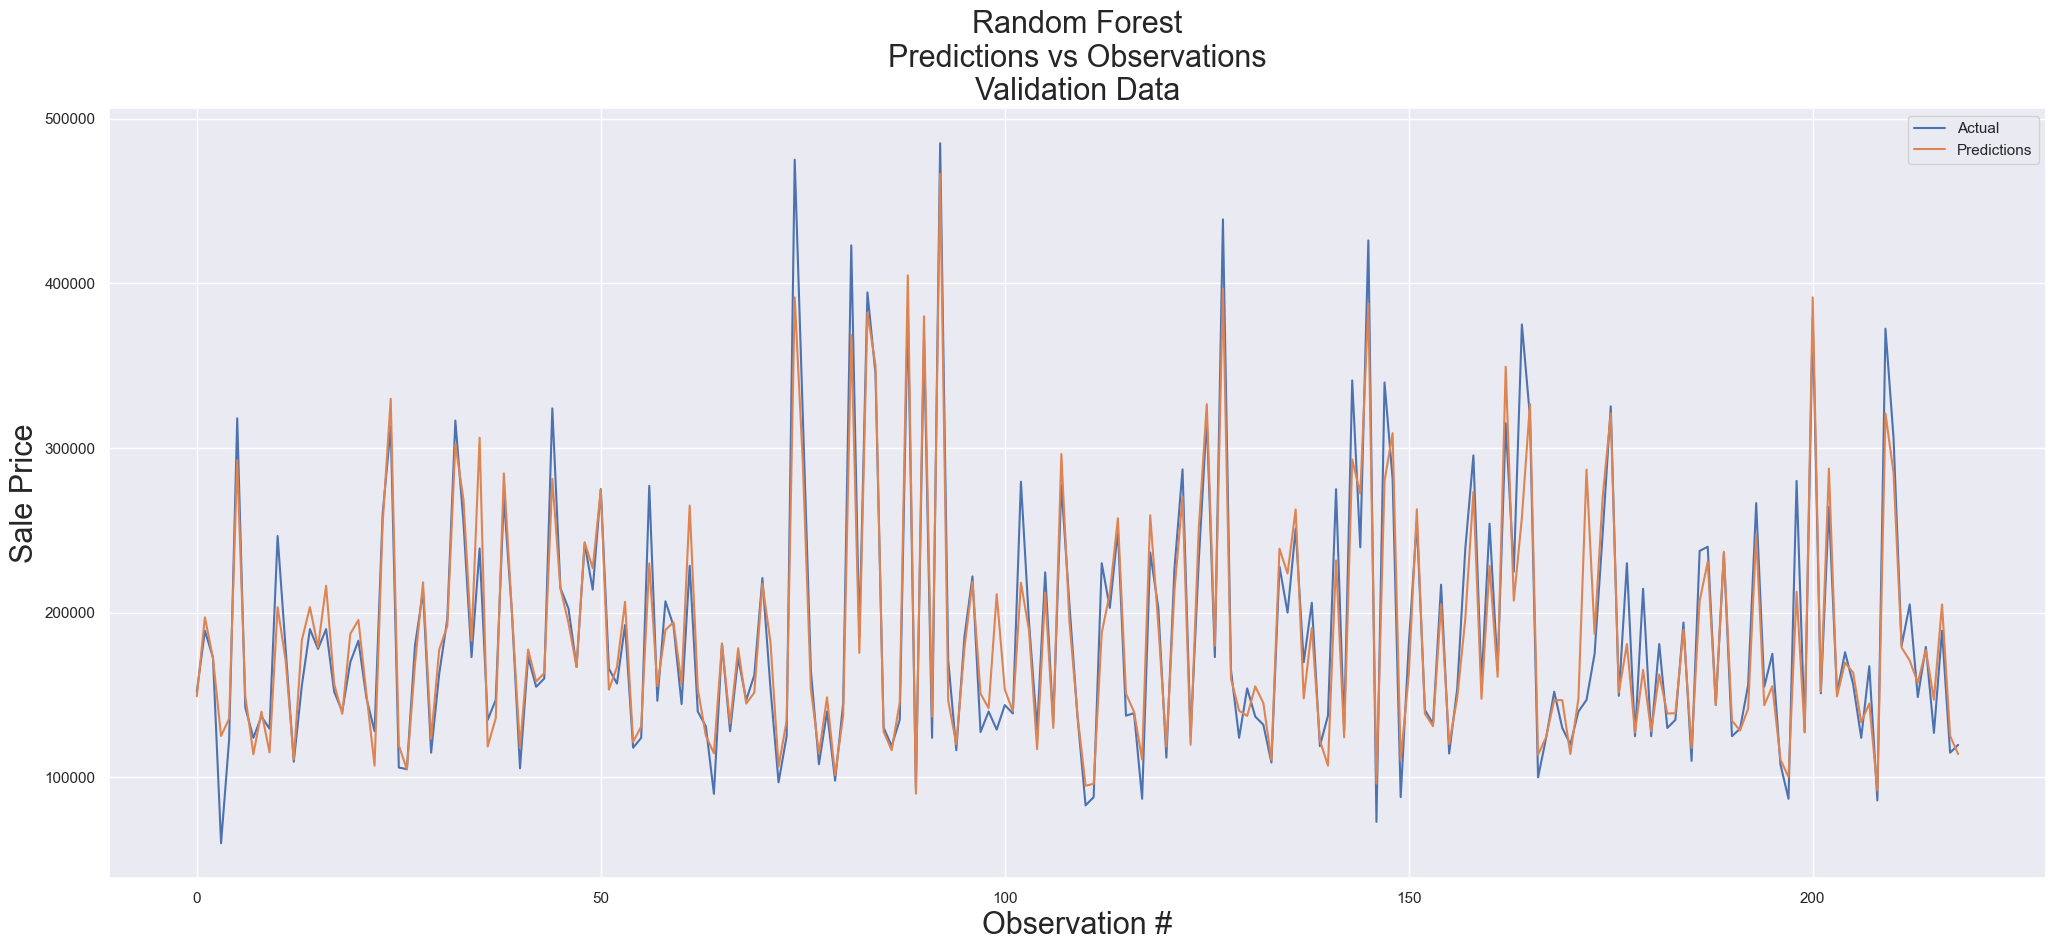

In [87]:
model_plot(model_predictions['RF'], y_test, 'Random Forest')

In [88]:
create_submission(models['RF'], 'RandomForest')

<b>XGBoost</b>

In [89]:
param_grid = {
    'n_estimators': [100, 200, 500, 1000, 12000],
    'learning_rate': [0.005, 0.01, 0.05],
    'random_state': [1, 7, 11, 42]
}
test = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator = test, param_grid = param_grid, 
                          cv = 3, verbose = 1, n_jobs=4)

In [90]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=4,
             param_grid={'learning_rate': [0.005, 0.01, 0.05],
                         'n_estimators': [100, 200, 500, 1000, 12000],
                         'random_state': [1, 7, 11, 42]},
             verbose=1)

In [91]:
grid_search.best_params_

{'learning_rate': 0.005, 'n_estimators': 12000, 'random_state': 1}

In [92]:
model_predictions['XGB'] = grid_search.predict(X_test)
evaluation(model_predictions['XGB'], y_test)

RMSLE: 0.11946183147316702
R2: 0.9041623987891179


In [93]:
model_test = xgb.XGBRegressor(n_estimators=12000, learning_rate=0.05, early_stopping_rounds=500, random_state=1, n_jobs=4)
model_test.fit(X_train, y_train, eval_set=[(X_test, y_test)])
model_predictions['XGB'] = model_test.predict(X_test)
evaluation(model_predictions['XGB'], y_test)

[0]	validation_0-rmse:77449.31888
[1]	validation_0-rmse:74385.94297
[2]	validation_0-rmse:71590.47156
[3]	validation_0-rmse:68959.84052
[4]	validation_0-rmse:66496.72455
[5]	validation_0-rmse:64175.67258
[6]	validation_0-rmse:61978.58971
[7]	validation_0-rmse:59902.28473
[8]	validation_0-rmse:58043.65103
[9]	validation_0-rmse:56092.39667
[10]	validation_0-rmse:54514.75491
[11]	validation_0-rmse:52852.72534
[12]	validation_0-rmse:51345.56390
[13]	validation_0-rmse:49923.70037
[14]	validation_0-rmse:48485.56380
[15]	validation_0-rmse:47178.33997
[16]	validation_0-rmse:46083.29492
[17]	validation_0-rmse:44850.58831
[18]	validation_0-rmse:43847.15338
[19]	validation_0-rmse:42724.96482
[20]	validation_0-rmse:41741.14154
[21]	validation_0-rmse:40756.50283
[22]	validation_0-rmse:39873.51252
[23]	validation_0-rmse:39002.15753
[24]	validation_0-rmse:38292.97957
[25]	validation_0-rmse:37521.37255
[26]	validation_0-rmse:36809.28706
[27]	validation_0-rmse:36250.36328
[28]	validation_0-rmse:35673.7

In [94]:
models['XGB'] = model_test

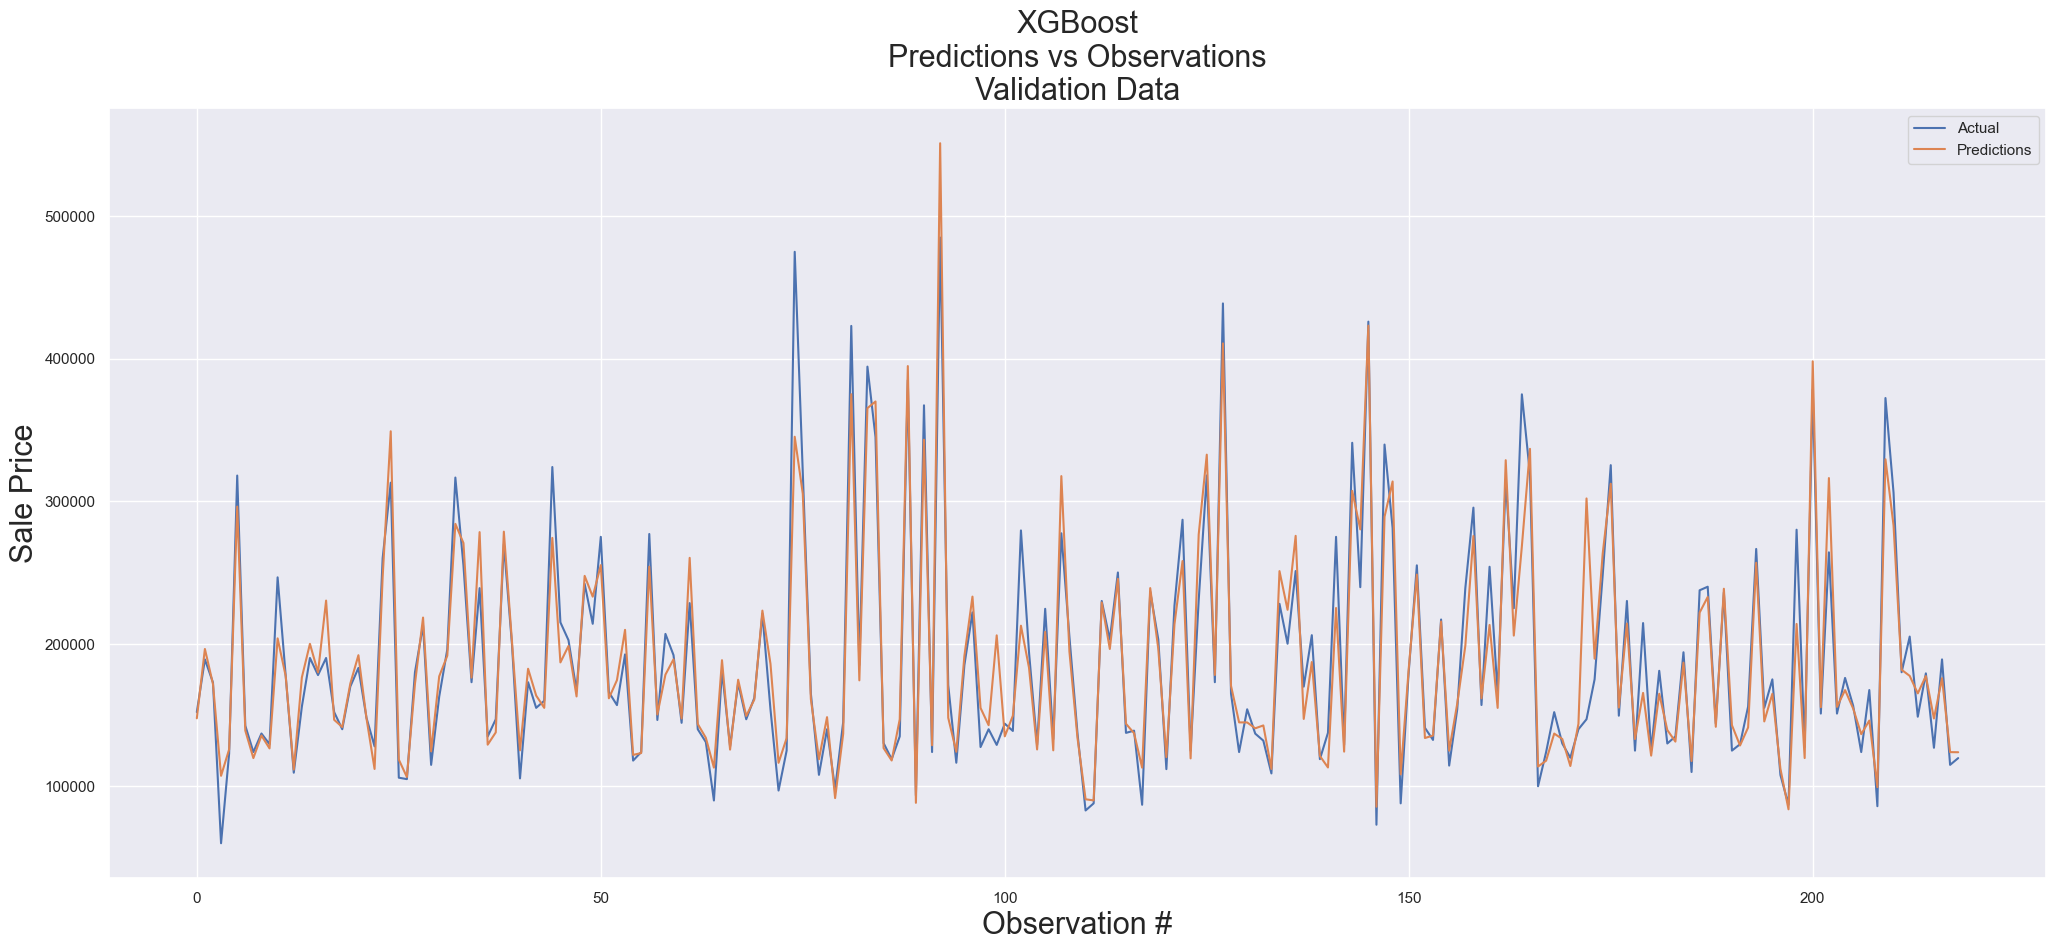

In [95]:
model_plot(model_predictions['XGB'], y_test, 'XGBoost')

In [96]:
create_submission(models['XGB'], 'XGBoost')

<b>Gradient Boost</b>

In [97]:
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': [0.005, 0.01, 0.05],
    'random_state': [1, 7, 11, 42]
}
test = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator = test, param_grid = param_grid, 
                          cv = 3, verbose = 1, n_jobs=4)

In [98]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=4,
             param_grid={'learning_rate': [0.005, 0.01, 0.05],
                         'n_estimators': [100, 200, 500, 1000],
                         'random_state': [1, 7, 11, 42]},
             verbose=1)

In [99]:
grid_search.best_params_

{'learning_rate': 0.05, 'n_estimators': 1000, 'random_state': 7}

In [100]:
models['GB'] = GradientBoostingRegressor(learning_rate=0.05, n_estimators=1000, random_state=7)
models['GB'].fit(X_train, y_train)
model_predictions['GB'] = models['GB'].predict(X_test)
evaluation(model_predictions['GB'], y_test)

RMSLE: 0.11180159808572879
R2: 0.920132930945163


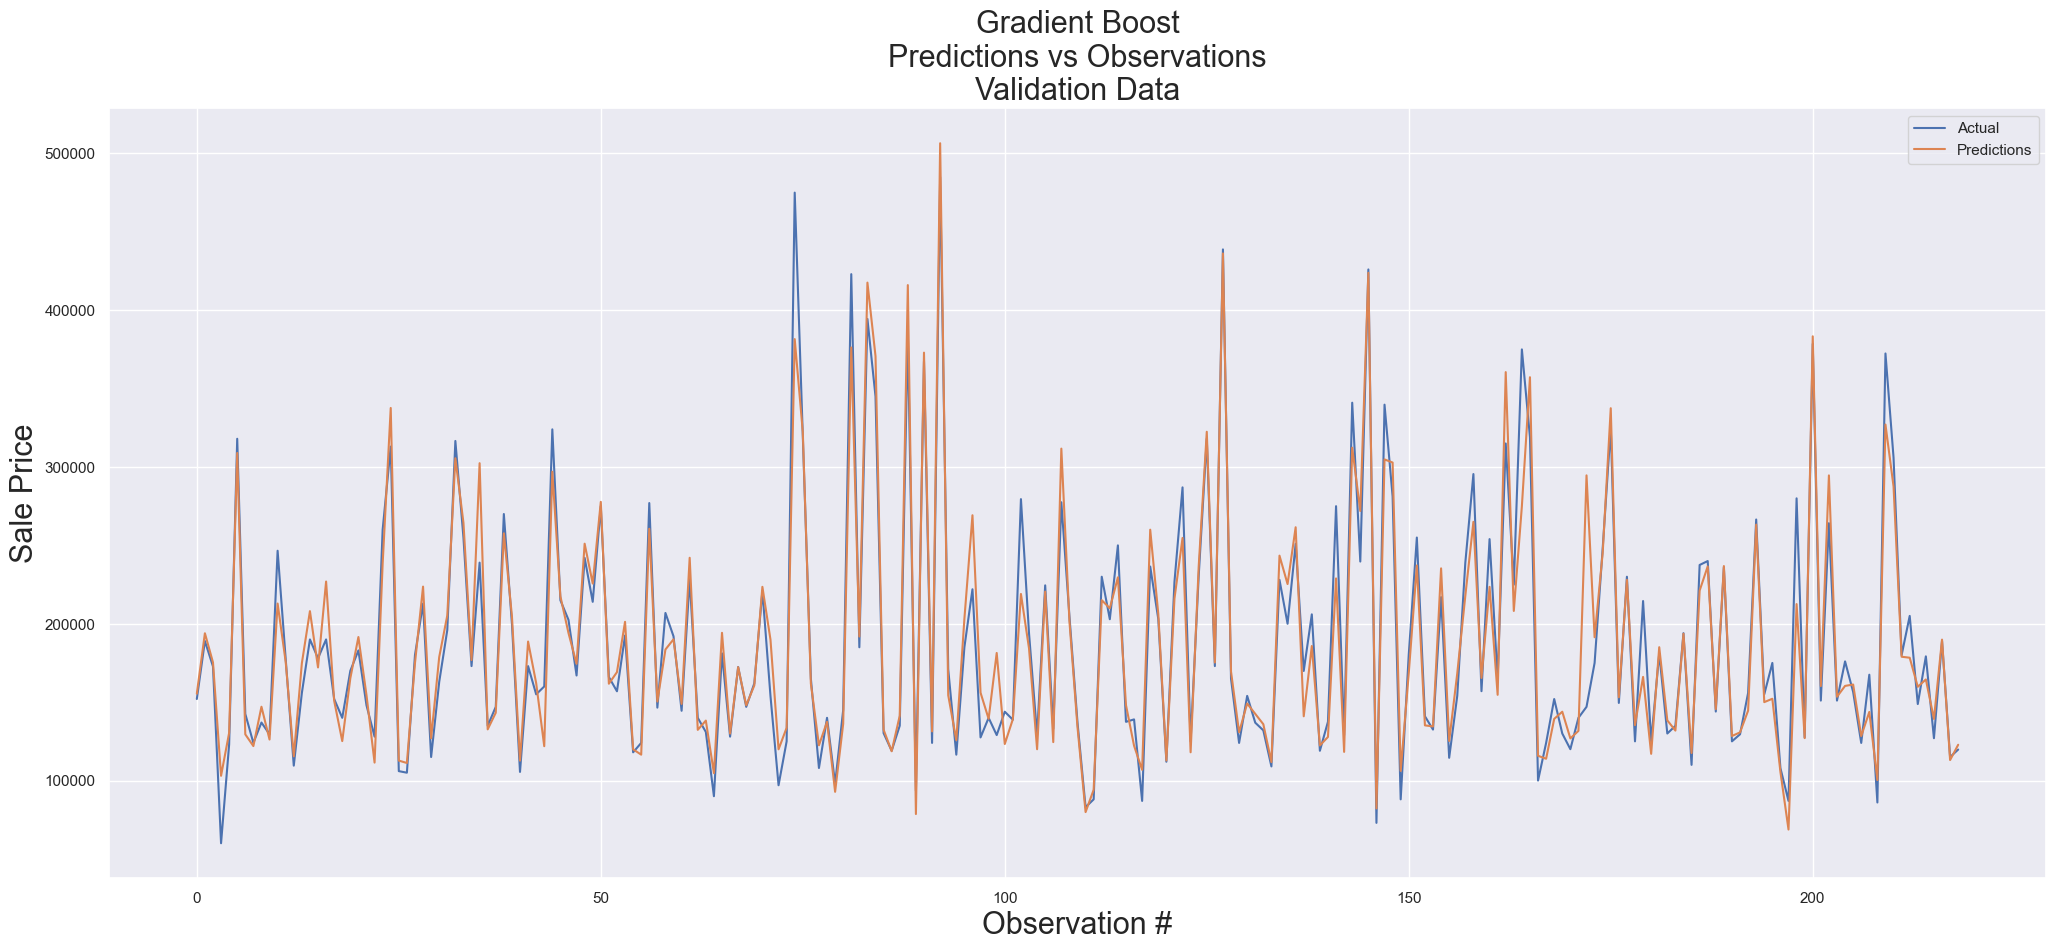

In [101]:
model_plot(model_predictions['GB'], y_test, 'Gradient Boost')

In [102]:
create_submission(models['GB'], 'GradientBoost')

<b>Weighted Average</b>

In [103]:
rmsle = {}
rmsle['RF'] = np.sqrt(mean_squared_error(np.log(model_predictions['RF']), np.log(y_test)))
rmsle['GB'] = np.sqrt(mean_squared_error(np.log(model_predictions['GB']), np.log(y_test)))
rmsle['XGB'] = np.sqrt(mean_squared_error(np.log(model_predictions['XGB']), np.log(y_test)))

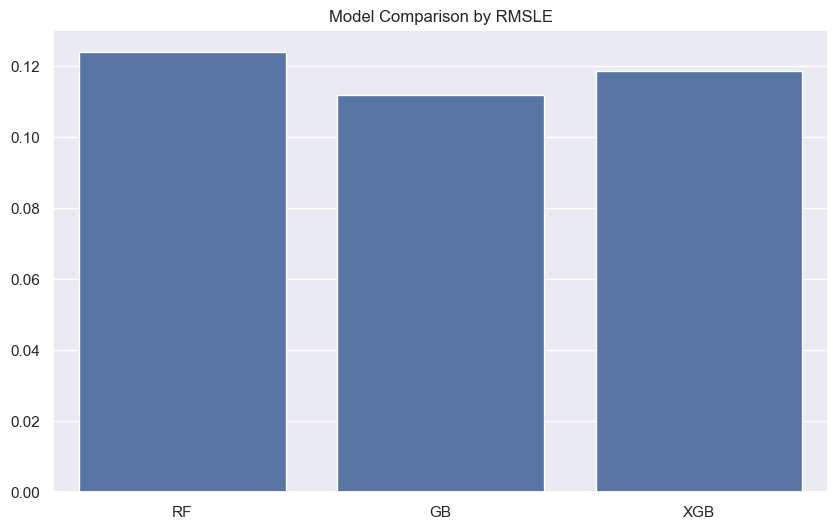

In [104]:
plt.figure(figsize=(10,6), dpi=100)
plt.title("Model Comparison by RMSLE")
sns.barplot(x=list(rmsle.keys()), y=list(rmsle.values()));

In [105]:
def weighted_rmsle(weight_RF, weight_GB, weight_XGB):
    predictions_weighted = model_predictions['RF'] * weight_RF + model_predictions['GB'] * weight_GB + model_predictions['XGB'] * weight_XGB
    return np.sqrt(mean_squared_error(np.log(predictions_weighted), np.log(y_test)))

In [106]:
best_rf = 0.1
best_gb = 0.1
best_xgb = 0.1
best_rmsle = 1
test_range = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
for i in test_range:
    for j in test_range:
        for k in test_range:
            if weighted_rmsle(i, j, k) <= weighted_rmsle(best_rf, best_gb, best_xgb):
                best_rf = i
                best_gb = j
                best_xgb = k
                print(f'RF: {i}')
                print(f'GB: {j}')
                print(f'XGB: {k}')
                print(f'RMSLE: {weighted_rmsle(i, j, k)}')

RF: 0.1
GB: 0.1
XGB: 0.1
RMSLE: 1.2014533036659882
RF: 0.1
GB: 0.1
XGB: 0.2
RMSLE: 0.9154550976486374
RF: 0.1
GB: 0.1
XGB: 0.3
RMSLE: 0.6946647888195651
RF: 0.1
GB: 0.1
XGB: 0.4
RMSLE: 0.5157949226936009
RF: 0.1
GB: 0.1
XGB: 0.5
RMSLE: 0.3672213524425646
RF: 0.1
GB: 0.1
XGB: 0.6
RMSLE: 0.2441644857152919
RF: 0.1
GB: 0.1
XGB: 0.7
RMSLE: 0.1511574069931621
RF: 0.1
GB: 0.1
XGB: 0.8
RMSLE: 0.11603261028628817
RF: 0.1
GB: 0.2
XGB: 0.7
RMSLE: 0.11439026021149469
RF: 0.1
GB: 0.3
XGB: 0.6
RMSLE: 0.1130079611517866
RF: 0.1
GB: 0.4
XGB: 0.5
RMSLE: 0.11189695727493235
RF: 0.1
GB: 0.5
XGB: 0.4
RMSLE: 0.11106746386102442
RF: 0.1
GB: 0.6
XGB: 0.3
RMSLE: 0.11052835413842015
RF: 0.1
GB: 0.7
XGB: 0.2
RMSLE: 0.11028691493487333
RF: 0.2
GB: 0.7
XGB: 0.1
RMSLE: 0.11011413206091636


In [107]:
predictions_weighted = model_predictions['RF']*best_rf + model_predictions['GB']*best_gb + model_predictions['XGB']*best_xgb

In [108]:
evaluation(predictions_weighted, y_test)

RMSLE: 0.11011413206091636
R2: 0.9215262368908628


In [109]:
best_rf

0.2

In [110]:
best_gb

0.7

In [111]:
best_xgb

0.1

In [112]:
test = data_original.iloc[1460:]
test = test.drop('SalePrice', axis=1)
model_predictions['RF'] = models['RF'].predict(test)
model_predictions['GB'] = models['GB'].predict(test)
model_predictions['XGB'] = models['XGB'].predict(test)
predictions = model_predictions['RF']*best_rf + model_predictions['GB']*best_gb+model_predictions['XGB']*best_xgb
submission = pd.DataFrame(predictions, columns=['SalePrice'], index=range(1461, 1461 + len(predictions)))
submission.to_csv('WeightedAverage.csv', index_label='Id')

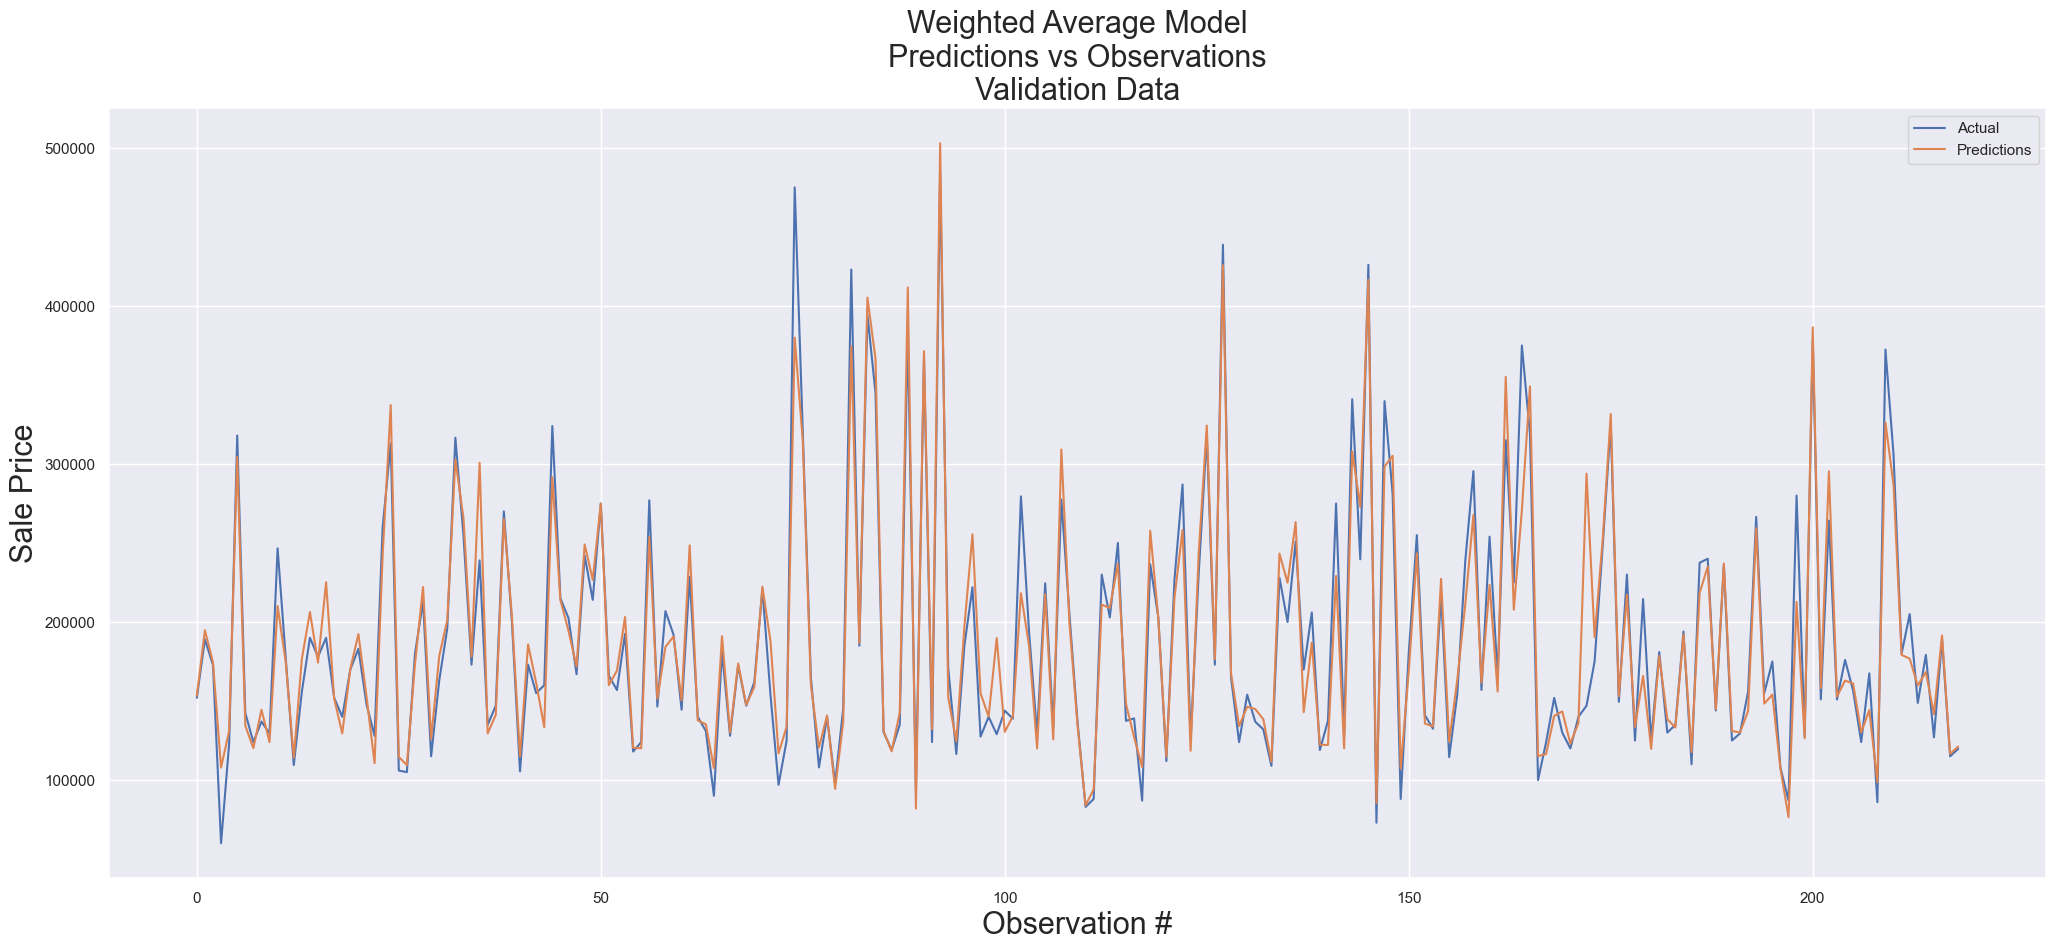

In [113]:
model_plot(predictions_weighted, y_test, "Weighted Average Model")